# DSPM Final Project: Social Media Analysis

# Abishaik Mohan | Diksha Chand | Muhammad Asad Shoaib

In [1]:
# Install required packages
!pip install vaderSentiment
!pip install textblob  
!pip install wordcloud
!pip install pyLDAvis

# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import textblob 
import warnings
import re
import string
import nltk
import pyLDAvis.gensim_models
import json
import os
import pickle 
import spacy
import gensim
import pyLDAvis
import gensim.corpora as corpora
import matplotlib.colors as mcolors
import missingno as msno

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import Phrases
from gensim import corpora
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from spacy import displacy
from gensim.utils import simple_preprocess
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

/Users/masad/opt/anaconda3/lib/python3.9/site-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/Users/masad/opt/anaconda3/lib/python3.9/site-packages/pkg_resources/__init__.py:2309: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/Users/masad/opt/anaconda3/lib/python3.9/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.lin

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package punkt to /Users/masad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/masad/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/masad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /Users/masad/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Exploratory Data Analysis

In [3]:
# Read the dataset
data = pd.read_excel("Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

       Ratings and Scores                                              Title  \
0                     NaN  Have you been denied a second/third pump? Feel...   
1                     NaN                                          Metformin   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
4                     NaN                   No bath salts, bath oils, soaks?   
...                   ...                                                ...   
37839                 NaN  If you were magically cured of type I diabetes...   
37840                 NaN                A question for the older Diabetics.   
37841                 NaN                           Apple IOS 16 public beta   
37842                 NaN                                                NaN   
37843                 NaN                A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
4          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37839      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   
37842   Instagram              Original      No   No Media   
37843      Forums  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  ...   
4                                                    NaN  ...   
...                                                  ...  ...   
37839                                                NaN  ...   
37840                                                NaN  ...   
37841                             

In [4]:
# Display dataset metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      37844 non-null  object 
 1   Sound Bite Text                              37844 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        36273 non-null  object 
 4   Source Type                                  37844 non-null  object 
 5   Post Type                                    35165 non-null  object 
 6   Is Paid                                      37844 non-null  object 
 7   Media Type                                   37844 non-null  object 
 8   URL                                          37844 non-null  object 
 9   Media Link                                   1253 non-null   object 
 10

In [5]:
# Checking summary statistics
data.describe()

Ratings and Scores  Author Location - Other  \
count                 0.0                      0.0   
mean                  NaN                      NaN   
std                   NaN                      NaN   
min                   NaN                      NaN   
25%                   NaN                      NaN   
50%                   NaN                      NaN   
75%                   NaN                      NaN   
max                   NaN                      NaN   

       Followers/Daily Unique Visitors/Subscribers      Richness  Tags  \
count                                 3.082000e+04  37844.000000   0.0   
mean                                  4.337758e+05      1.903393   NaN   
std                                   3.093652e+06      1.725630   NaN   
min                                   1.000000e+00      0.000000   NaN   
25%                                   2.167150e+04      0.000000   NaN   
50%                                   3.861700e+04      2.000000   NaN   
75%                                   7.851900e+04      3.000000   NaN   
max                                   4.229812e+07     15.000000   NaN   

       Total Engagements  Post Comments   Post Likes  Post Shares  Post Views  \
count         618.000000     413.000000   594.000000          0.0         0.0   
mean           55.522654       6.237288    53.429293          NaN         NaN   
std           269.514703      16.962748   270.011334          NaN         NaN   
min             1.000000       1.000000     1.000000          NaN         NaN   
25%             5.000000       1.000000     4.000000          NaN         NaN   
50%            12.000000       3.000000    11.000000          NaN         NaN   
75%            31.000000       6.000000    28.750000          NaN         NaN   
max          5782.000000     308.000000  5720.000000          NaN         NaN   

       ...  LexisNexis Company - Any  LexisNexis Person - High  \
count  ...                       0.0                       0.0   
mean   ...                       NaN                       NaN   
std    ...                       NaN                       NaN   
min    ...                       NaN                       NaN   
25%    ...                       NaN                       NaN   
50%    ...                       NaN                       NaN   
75%    ...                       NaN                       NaN   
max    ...                       NaN                       NaN   

       LexisNexis Person - Any  LexisNexis Institution - High  \
count                      0.0                            0.0   
mean                       NaN                            NaN   
std                        NaN                            NaN   
min                        NaN                            NaN   
25%                        NaN                            NaN   
50%                        NaN                            NaN   
75%                        NaN                            NaN   
max                        NaN                            NaN   

       LexisNexis Institution - Any  LexisNexis Subject Group 1  \
count                           0.0                         0.0   
mean                            NaN                         NaN   
std                             NaN                         NaN   
min                             NaN                         NaN   
25%                             NaN                         NaN   
50%                             NaN                         NaN   
75%                             NaN                         NaN   
max                             NaN                         NaN   

       LexisNexis Subject 1  LexisNexis Subject Group 2  LexisNexis Subject 2  \
count                   0.0                         0.0                   0.0   
mean                    NaN                         NaN                   NaN   
std                     NaN                         NaN                   NaN   
min           

In [6]:
# Display dataset dimensions
print("The dimensions of this dataset is: " + str(data.shape))

The dimensions of this dataset is: (37844, 63)


In [7]:
# Number of rows before data cleansing
print("The number of rows before dataset cleansing is: " + str(data.shape[0]))

The number of rows before dataset cleansing is: 37844


In [8]:
# Check null values
data.isnull().sum()

Post ID                           0
Sound Bite Text                   0
Ratings and Scores            37844
Title                          1571
Source Type                       0
                              ...  
LexisNexis Subject Group 1    37844
LexisNexis Subject 1          37844
LexisNexis Subject Group 2    37844
LexisNexis Subject 2          37844
LexisNexis Other Subjects     37844
Length: 63, dtype: int64

<AxesSubplot:>

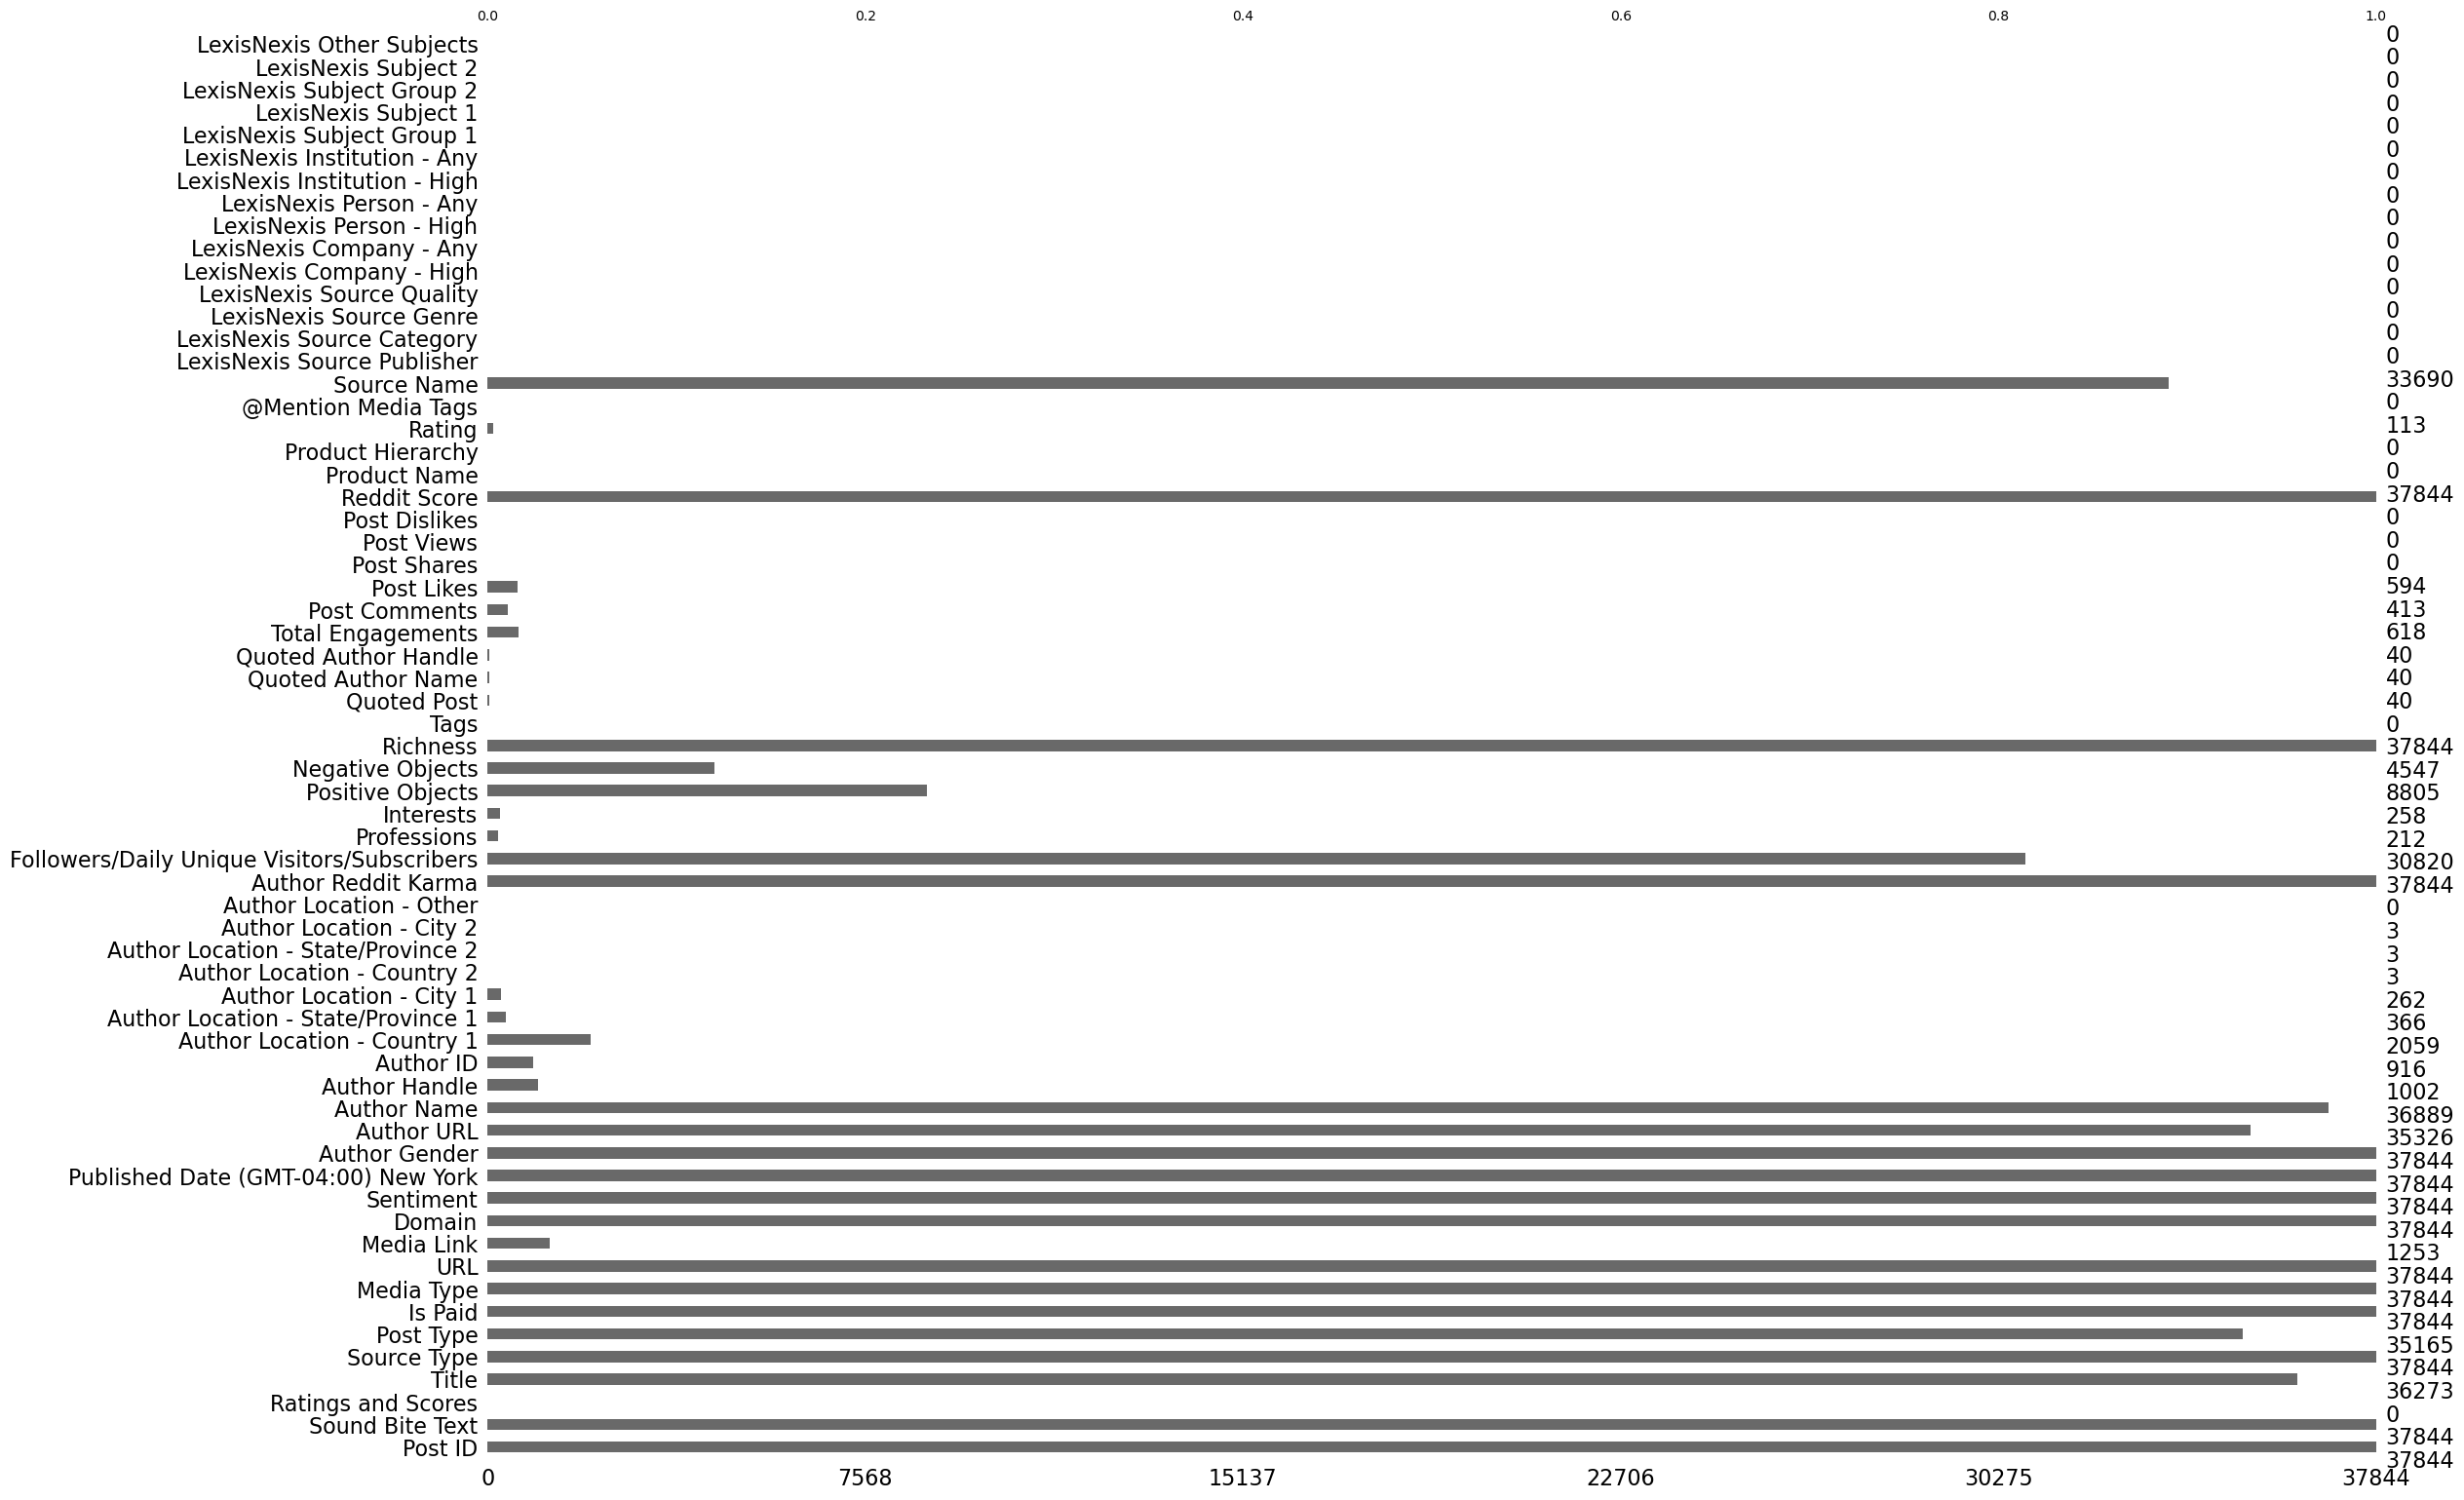

In [9]:
# Visualizing the missing data
msno.bar(data)

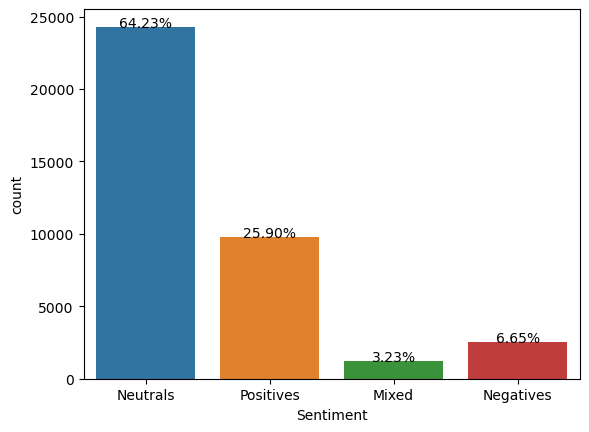

In [10]:
# Create the countplot for Sentiment
ax = sns.countplot(x='Sentiment', data=data)

# Calculate percentages for each category
totals = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / totals) * 100),
            ha="center")

# Show the plot
plt.show()

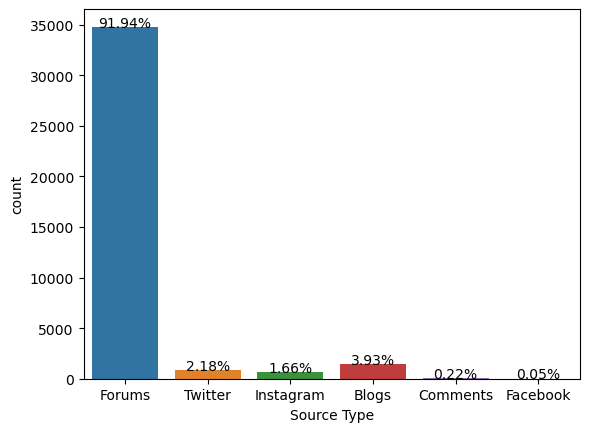

In [11]:
# Create the countplot for Forums
ax = sns.countplot(x='Source Type', data=data)

# Calculate percentages for each category
totals = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / totals) * 100),
            ha="center")

# Show the plot
plt.show()

## Data Cleansing

In [12]:
# Filter rows that do not have relevant keywords to continuous glucose monitoring
relevant_keywords = ['cgm','dexcom','libre','freestyle', 'continuous glucose monitoring', 'continuous glucose monitor',
                     'diabetes','type 1 diabetes','type 2 diabetes','HbA1c']

def filter_dataframe(df):
    n_rows = len(df)
    temp_df = pd.DataFrame(columns = df.columns)
    for i in range(n_rows):
        text = df.iloc[i]['Sound Bite Text'].lower()
        contains_rel = False
        for word in relevant_keywords:
            if word in text:
                contains_rel = True
                break
        if not contains_rel:
             temp_df.loc[len(temp_df)] = df.iloc[i]
    df = pd.concat([df,temp_df]).drop_duplicates(keep=False)
    return df


data = filter_dataframe(data)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

       Ratings and Scores                                              Title  \
0                     NaN  Have you been denied a second/third pump? Feel...   
1                     NaN                                          Metformin   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
4                     NaN                   No bath salts, bath oils, soaks?   
...                   ...                                                ...   
37839                 NaN  If you were magically cured of type I diabetes...   
37840                 NaN                A question for the older Diabetics.   
37841                 NaN                           Apple IOS 16 public beta   
37842                 NaN                                                NaN   
37843                 NaN                A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
4          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37839      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   
37842   Instagram              Original      No   No Media   
37843      Forums  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  ...   
4                                                    NaN  ...   
...                                                  ...  ...   
37839                                                NaN  ...   
37840                                                NaN  ...   
37841                             

In [13]:
# Drop columns that contain all NaNs
data = data.dropna(axis=1, how='all')
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [14]:
# Convert text in 'Sound Bite Text' to lowercase
data['text_lower'] = data['Sound Bite Text'].str.lower()

In [15]:
# Remove URLs from the text
def remove_urls(text):
    url_pattern = r'http\S+|www\S+'
    return re.sub(url_pattern, '', text)

data['text_lower'] = data['text_lower'].apply(remove_urls)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [16]:
# Remove punctuation from the text
def remove_punc(text):
    punc_pattern = r'[^\w\s]'
    return re.sub(punc_pattern, '', text)

data['text_lower'] = data['text_lower'].apply(remove_punc)
# data

# Remove hashtags from the text
def remove_tag(text):
    punc_pattern = r'#\w+'
    return re.sub(punc_pattern, '', text)

data['text_lower'] = data['text_lower'].apply(remove_tag)
# data

In [17]:
# Remove mentions (@username) from the text

# Define pattern for mentions
mention_pattern = re.compile(r'@[A-Za-z0-9_]+')

# Function to remove mentions from text
def remove_mentions(text):
    return mention_pattern.sub('', text)

# Apply function to 'text_lower' column
data['text_lower'] = data['text_lower'].apply(remove_mentions)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [18]:
# Remove stop words from the text
stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stopwords]
    return ' '.join(filtered_text)

data['text_lower'] = data['text_lower'].apply(remove_stopwords)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [19]:
# Remove numerical values from the text 
def remove_numbers(text):
    return text.translate(str.maketrans('', '', string.digits))

data['text_lower'] = data['text_lower'].apply(remove_numbers)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [20]:
# Remove single characters
def remove_single_chars(text):
    return re.sub(r'\b\w\b', '', text)

data['text_lower'] = data['text_lower'].apply(lambda text: remove_single_chars(text))
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [21]:
# Tokenize posts and part of speech tagging
tokenizer = RegexpTokenizer(r"[\w']+")
data['tagged'] = (data['text_lower'].apply(tokenizer.tokenize)).apply(lambda text: nltk.pos_tag(text))
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [22]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

def lemmatize(text):
    tokenizer = RegexpTokenizer(r"[\w']+")
    tokens = tokenizer.tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in pos_tags]
    return " ".join(lemmatized_tokens)

def get_noun_phrases(text):
    blob = TextBlob(text)
    noun_phrases = blob.noun_phrases
    return noun_phrases

data['text_lower'] = data['text_lower'].apply(lemmatize)
data['phrases'] = data['text_lower'].apply(get_noun_phrases)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [23]:
# Perform Sentiment Analysis using Vader 
# For original posts, consider 'Title' as well. For replies & comments or NaNs, consider 'Sound Bite Text' alone

analyzer = SentimentIntensityAnalyzer()

def format_output(output_dict): 
    polarity = "Neutral"
    if output_dict['compound'] >= 0.05:
        polarity = "Positive"
    elif output_dict['compound'] <= -0.05:
        polarity = "Negative"
    return polarity

def get_vader_prediction(df):
    sents = []
    for i in range(len(df)):
        dt = df.iloc[i]
        output_dict = analyzer.polarity_scores(dt['Sound Bite Text'])
        if dt['Post Type'] == 'Original' and pd.notna(dt['Title']):
            output_dict_title = analyzer.polarity_scores(dt['Title'])
            for key in output_dict_title:
                output_dict[key] += output_dict_title[key]
                output_dict[key] /= 2
        sents.append(format_output(output_dict))
    return sents

data["vader_prediction"] = get_vader_prediction(data)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

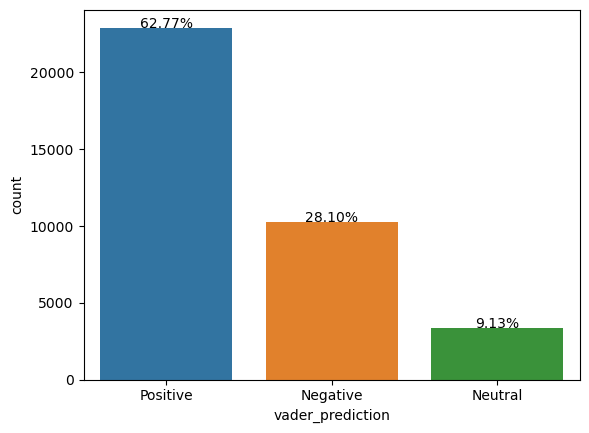

In [24]:
ax = sns.countplot(x='vader_prediction', data=data)

# Calculate percentages for each category
totals = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / totals) * 100),
            ha="center")

# Show the plot
plt.show()

In [25]:
# Get sentiment predictions from Text Blob as well

def format_score(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

def get_textblob_prediction(df):
    sents = []
    for i in range(0, len(df)):
        dt = df.iloc[i]
        pol = TextBlob(dt['Sound Bite Text']).sentiment.polarity
        if dt['Post Type'] == 'Original' and dt['Title'] is not None:
            pol_title = TextBlob(str(dt['Title'])).sentiment.polarity
            pol += pol_title
            pol /= 2
        sents.append(format_score(pol))
    return sents

data['blob_prediction'] = get_textblob_prediction(data)
data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

                                                   Title Source Type  \
0      Have you been denied a second/third pump? Feel...      Forums   
1                                              Metformin      Forums   
2                                                    NaN     Twitter   
3                                                    NaN   Instagram   
4                       No bath salts, bath oils, soaks?      Forums   
...                                                  ...         ...   
37839  If you were magically cured of type I diabetes...      Forums   
37840                A question for the older Diabetics.      Forums   
37841                           Apple IOS 16 public beta      Forums   
37842                                                NaN   Instagram   
37843                A question for the older Diabetics.      Forums   

                  Post Type Is Paid Media Type  \
0      Replies and Comments      No   No Media   
1      Replies and Comments      No   No Media   
2      Replies and Comments      No       Link   
3                  Original      No      Image   
4      Replies and Comments      No   No Media   
...                     ...     ...        ...   
37839  Replies and Comments      No   No Media   
37840  Replies and Comments      No   No Media   
37841  Replies and Comments      No   No Media   
37842              Original      No   No Media   
37843  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link         Domain  ...  \
0                                                    NaN     reddit.com  ...   
1                                                    NaN     reddit.com  ...   
2                                                    NaN    twitter.com  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  instagram.com  ...   
4                                                    NaN     reddit.com  ...   
...                                                  ...            ...  ...   
37839                                                NaN     reddit.com  ...   
37840                                                NaN     reddit.com  ...   
37841                                                NaN     reddit.com  ...   
37842                                                NaN  i

In [26]:
# Number of rows after data cleansing
print("The number of rows after dataset cleansing is: " + str(data.shape[0]))

The number of rows after dataset cleansing is: 36511


# General CGM Analysis

### a) What are patient expectations of CGMs? What are patient knowledge gaps with CGMs?

In [27]:
# Filter relevant rows for patient expectations and knowledge gaps
expectation_words = ['expect', 'wish', 'hope', 'need', 'want', 'How do I', 'How to', 'I can\'t', 'I cannot', 'I don\'t know']

filter_cgm = ['cgm', 'continuous glucose monitoring', 'continuous glucose monitor']
data_cgm = data[data['text_lower'].str.contains('|'.join(expectation_words))].copy(deep = True)

In [28]:
data_exp = data_cgm[data_cgm['text_lower'].str.contains('|'.join(expectation_words))]

In [29]:
# Remove frequent Words
frequent_words = ['cgm', 'dexcom', 'libre', 'freestyle', 'use', 'need']

def remove_frequent_words(text):
    # Split the text into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
data_exp['text_lower'] = data_exp['text_lower'].apply(remove_frequent_words)

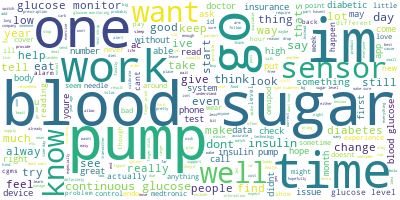

In [30]:
# Code taken from: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# Join the different processed titles together.
long_string = ','.join(list(data_exp['text_lower'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
sen = data_exp['text_lower']
data_words = list(sent_to_words(sen))

In [32]:
print(data_words[:1][0][:30])

['number', 'great', 'estimate', 'ac', 'ish', 'doesnt', 'care', 'say', 'want', 'actual', 'lab', 'look', 'stuff', 'take', 'word']


In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [34]:
# Code taken from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"get" + 0.019*"go" + 0.017*"time" + 0.016*"like" + 0.016*"want" + '
  '0.015*"pump" + 0.015*"dont" + 0.013*"would" + 0.012*"year" + 0.012*"know"'),
 (1,
  '0.041*"glucose" + 0.034*"blood" + 0.030*"sugar" + 0.026*"diabetes" + '
  '0.020*"monitor" + 0.017*"continuous" + 0.016*"level" + 0.011*"keep" + '
  '0.011*"insulin" + 0.010*"type"'),
 (2,
  '0.036*"insurance" + 0.022*"needle" + 0.021*"cover" + 0.020*"medical" + '
  '0.018*"pay" + 0.018*"supply" + 0.015*"insulin" + 0.014*"prescription" + '
  '0.014*"company" + 0.014*"pen"'),
 (3,
  '0.040*"im" + 0.024*"day" + 0.024*"sensor" + 0.021*"one" + 0.013*"new" + '
  '0.012*"also" + 0.012*"pump" + 0.011*"since" + 0.011*"app" + 0.010*"phone"')]


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [36]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.224016  0.229570       1        1  42.973605
1     -0.024339  0.027616       2        1  24.515011
3     -0.090426 -0.324387       3        1  24.453128
2      0.338782  0.067201       4        1   8.058256, topic_info=          Term         Freq        Total Category  logprob  loglift
30     glucose  4790.000000  4790.000000  Default  30.0000  30.0000
97          im  4612.000000  4612.000000  Default  29.0000  29.0000
17       blood  4023.000000  4023.000000  Default  28.0000  28.0000
265      sugar  3481.000000  3481.000000  Default  27.0000  27.0000
245   diabetes  3074.000000  3074.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
79       month   435.804288  1213.072650   Topic4  -4.4796   1.4948
157     doctor   413.147442  1119.032285   Topic4  -4.5330   1.5221
316       tell   379.447286   991.452986   Topic4  -4.6181   1.5580
33     insulin   583.493288  4096.159413   Topic4  -4.1878   0.5697
2201      skin   224.297719   344.054035   Topic4  -5.1438   2.0906

[210 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
636       2  0.221362   able
636       3  0.777899   able
439       1  0.999125    ago
239       2  0.403143   also
239       3  0.596929   also
...     ...       ...    ...
236       4  0.003064   work
60        1  0.999677  would
86        1  0.940677   year
86        4  0.058909   year
572       1  0.999320  youre

[231 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

##### Finding dominant topic

In [37]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.8773   
1            1             0.0              0.4126   
2            2             0.0              0.4844   
3            3             0.0              0.5459   
4            4             3.0              0.5673   
5            5             3.0              0.6258   
6            6             0.0              0.8089   
7            7             1.0              0.4158   
8            8             0.0              0.8475   
9            9             0.0              0.4159   

                                            Keywords  \
0  get, go, time, like, want, pump, dont, would, ...   
1  get, go, time, like, want, pump, dont, would, ...   
2  get, go, time, like, want, pump, dont, would, ...   
3  get, go, time, like, want, pump, dont, would, ...   
4  im, day, sensor, one, new, also, pump, since, ...   
5  im, day, sensor, one, new, also, pump, since, ...   
6  get, go, time, like, want, pump, dont, would, ...   
7  glucose, blood, sugar, diabetes, monitor, cont...   
8  get, go, time, like, want, pump, dont, would, ...   
9  get, go, time, like, want, pump, dont, would, ...   

                                                Text  
0  My numbers are great now. Estimated a1c of 7%i...  
1  I tried it for a little while. No side effects...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...  
4  This is also because like a soak in a hot tub ...  
5  I’d like a new pancreas please ✌?? \n\n#type1d...  
6  I am a insulin dependent diabetic (type 1, T1D...  
7  Currently impatiently waiting! I was told we (...  
8  It depends on what insurance I have at that ti...  
9  I’m on the t-slim pump and Dexcom. Usually my ...

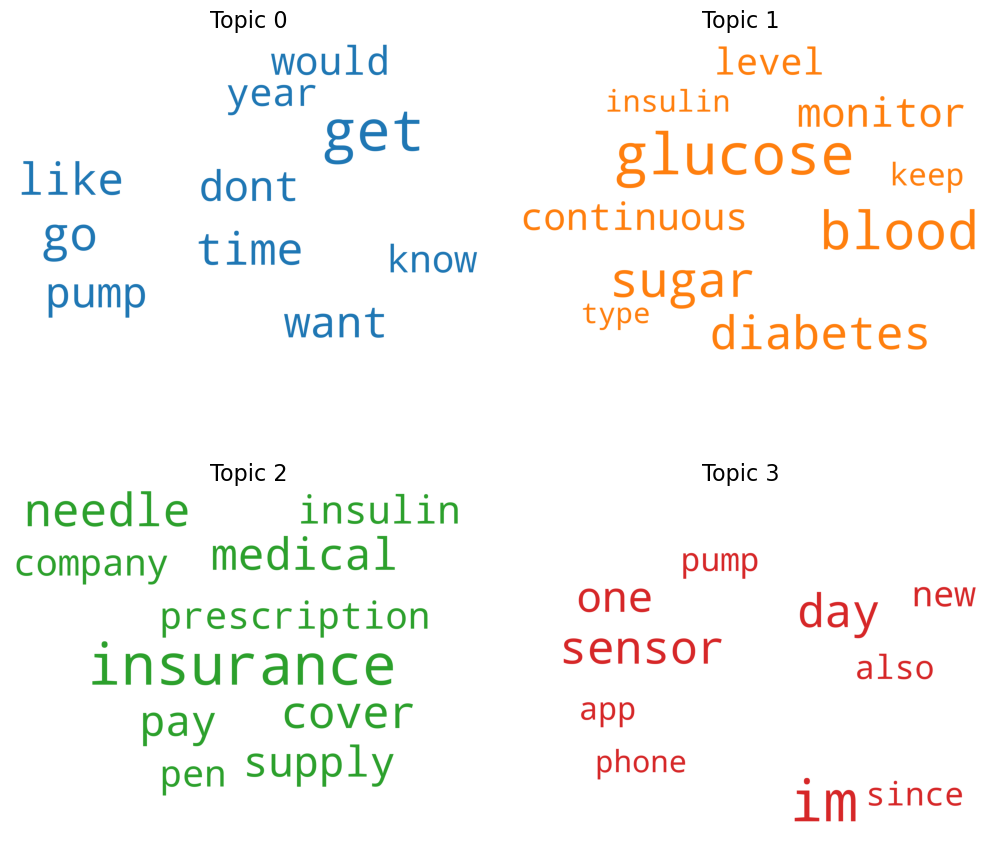

In [38]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

In [39]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9528   
1        1.0              0.8672   
2        2.0              0.8710   
3        3.0              0.9536   

                                                                              Keywords  \
0                             get, go, time, like, want, pump, dont, would, year, know   
1     glucose, blood, sugar, diabetes, monitor, continuous, level, keep, insulin, type   
2  insurance, needle, cover, medical, pay, supply, insulin, prescription, company, pen   
3                             im, day, sensor, one, new, also, pump, since, app, phone   

                                                                                   Representative Text  
0  I (32F) was diagnosed with CFRD about a year ago. A1C is fine, but I failed the glucose toleranc...  
1  Over here we don’t have the dexcom or t slim, we have libre 1 only and I think Medtronic pumps b...  
2  Im really sorry you are frustrated, but i get it. I felt the same way after my daughter was diag...  
3  I have a OnePlus 8T and I'm very grateful to have this program! I never installed the dexcom app...

In [40]:
pd.set_option('max_colwidth', None)
def display_top_docs(df, n):
    df_topicwise = df[df['Dominant_Topic'] == n]
    return df
i= 0.0
while(i < 5.0):
    display(display_top_docs(df_dominant_topic, i))
    i = i + 1

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0             0.0              0.8773   
1                1             0.0              0.4126   
2                2             0.0              0.4844   
3                3             0.0              0.5459   
4                4             3.0              0.5673   
...            ...             ...                 ...   
36813        37839             NaN                 NaN   
36814        37840             NaN                 NaN   
36815        37841             NaN                 NaN   
36816        37842             NaN                 NaN   
36817        37843             NaN                 NaN   

                                                       Keywords  \
0      get, go, time, like, want, pump, dont, would, year, know   
1      get, go, time, like, want, pump, dont, would, year, know   
2      get, go, time, like, want, pump, dont, would, year, know   
3      get, go, time, like, want, pump, dont, would, year, know   
4      im, day, sensor, one, new, also, pump, since, app, phone   
...                                                         ...   
36813                                                       NaN   
36814                                                       NaN   
36815                                                       NaN   
36816                                                       NaN   
36817                                                       NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.  
2                                                                       

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0             0.0              0.8773   
1                1             0.0              0.4126   
2                2             0.0              0.4844   
3                3             0.0              0.5459   
4                4             3.0              0.5673   
...            ...             ...                 ...   
36813        37839             NaN                 NaN   
36814        37840             NaN                 NaN   
36815        37841             NaN                 NaN   
36816        37842             NaN                 NaN   
36817        37843             NaN                 NaN   

                                                       Keywords  \
0      get, go, time, like, want, pump, dont, would, year, know   
1      get, go, time, like, want, pump, dont, would, year, know   
2      get, go, time, like, want, pump, dont, would, year, know   
3      get, go, time, like, want, pump, dont, would, year, know   
4      im, day, sensor, one, new, also, pump, since, app, phone   
...                                                         ...   
36813                                                       NaN   
36814                                                       NaN   
36815                                                       NaN   
36816                                                       NaN   
36817                                                       NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.  
2                                                                       

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0             0.0              0.8773   
1                1             0.0              0.4126   
2                2             0.0              0.4844   
3                3             0.0              0.5459   
4                4             3.0              0.5673   
...            ...             ...                 ...   
36813        37839             NaN                 NaN   
36814        37840             NaN                 NaN   
36815        37841             NaN                 NaN   
36816        37842             NaN                 NaN   
36817        37843             NaN                 NaN   

                                                       Keywords  \
0      get, go, time, like, want, pump, dont, would, year, know   
1      get, go, time, like, want, pump, dont, would, year, know   
2      get, go, time, like, want, pump, dont, would, year, know   
3      get, go, time, like, want, pump, dont, would, year, know   
4      im, day, sensor, one, new, also, pump, since, app, phone   
...                                                         ...   
36813                                                       NaN   
36814                                                       NaN   
36815                                                       NaN   
36816                                                       NaN   
36817                                                       NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.  
2                                                                       

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0             0.0              0.8773   
1                1             0.0              0.4126   
2                2             0.0              0.4844   
3                3             0.0              0.5459   
4                4             3.0              0.5673   
...            ...             ...                 ...   
36813        37839             NaN                 NaN   
36814        37840             NaN                 NaN   
36815        37841             NaN                 NaN   
36816        37842             NaN                 NaN   
36817        37843             NaN                 NaN   

                                                       Keywords  \
0      get, go, time, like, want, pump, dont, would, year, know   
1      get, go, time, like, want, pump, dont, would, year, know   
2      get, go, time, like, want, pump, dont, would, year, know   
3      get, go, time, like, want, pump, dont, would, year, know   
4      im, day, sensor, one, new, also, pump, since, app, phone   
...                                                         ...   
36813                                                       NaN   
36814                                                       NaN   
36815                                                       NaN   
36816                                                       NaN   
36817                                                       NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.  
2                                                                       

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0                0             0.0              0.8773   
1                1             0.0              0.4126   
2                2             0.0              0.4844   
3                3             0.0              0.5459   
4                4             3.0              0.5673   
...            ...             ...                 ...   
36813        37839             NaN                 NaN   
36814        37840             NaN                 NaN   
36815        37841             NaN                 NaN   
36816        37842             NaN                 NaN   
36817        37843             NaN                 NaN   

                                                       Keywords  \
0      get, go, time, like, want, pump, dont, would, year, know   
1      get, go, time, like, want, pump, dont, would, year, know   
2      get, go, time, like, want, pump, dont, would, year, know   
3      get, go, time, like, want, pump, dont, would, year, know   
4      im, day, sensor, one, new, also, pump, since, app, phone   
...                                                         ...   
36813                                                       NaN   
36814                                                       NaN   
36815                                                       NaN   
36816                                                       NaN   
36817                                                       NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.  
2                                                                       

## Patient Expectations of CGM:
- __Longer and more reliable battery life:__ 
    
    'I've learned to have extra batteries for the glucometer, learned the hard way, when my CGM died. I buy them in bulk- 10, for what one name brand battery would cost, and the lithium CR-2032 is used in a lot of electronics devices.'
    

- __To be more pocket-friendly:__ 
    
    'I tried the pump and absolutely hated it. I just use finger pricks and MDI's. I would consider a CGM if my insurance covered it. I think that would be small enough to be acceptable, and if it gets damaged it's not saving my life, just providing additional information.'
    

- __Alarms for emergencies:__ 

    'I'm hypoglycemia unaware. I don't sense/can't tell when my blood sugar is dangerously low. I require a CGM to tell me when that happens, especially so it doesn't happen in the middle of the night and I end up seizing or dying. CGMs are expensive. So basically, I'm already a cyborg and paying extra for the “privilege".'
    

- __To be attire-friendly:__ 
    
    'I’m an insulin pump wearer so I always need pockets and non restrictive waistlines where my tubing set/CGM is placed!'
    
    
## Knowledge gaps with CGM:

- __About general usage:__
    
    'Can I put my CGM on my thigh? I know we are told not to yet but if anyone has broke that rule are there any real consequences?'
    
    'Yes! Regardless, I still see thousands of Type 1 diabetics that still do not understand their diagnosis, insulin, and CGM trends. We have a bunch that do not know how to properly adjust basal rates, bolus times, and insulin pump sites.'
    
    
- __About effectiveness:__

    'Using insulin or oral meds? A pump? I’m especially curious about pump/CGMs because I’ve been managing with 3 different insulins (bolus Novolog w/a sliding scale & Lantus as my basal plus NPH to specifically manage my semi-elemental formula) and just a meter but as my pancreas gets worse my diabetic control does too and the meter/CGM folks seem to have better control. Is that accurate? I do know my endo said it’s fairly common to see 1 and 3c in pancreatic patients but he didn’t seem to know if one was more prevalent than the other.'
    
    
- __Related to individual-specific use-cases:__

    'Anyone have any tips about blood sugar control during a judo competition? I did a dry run with my CGM and found I couldn't directly rely on it and I generally ran low after each match. I have a metronic 670g. I was planning on a huge protein meal early in the morning and run temp auto mode to keep me at around 150 the entire time.'
    
    'she isn't willing to change anything else. She will not use a sugar monitor. She was contraindicated for a regular monitor due to self harm risk and insurance would not approve a CGM, so for the time being her doctor is okay with this, but she told me that until her doctor insists, even if she could get a CGM she wouldn't use it. What would she do with the information? After all, she won't change her diet.'

### b. What benefits are most important to diabetes patients?

In [41]:
# Filter the data to include positive sentiments
data_cgm = data[data['vader_prediction'] == 'Positive'].copy(deep = True)

In [42]:
benefit_words = ['advantage', 'benefit', 'no side effects', 'important', 'reliable', 'affordable', 'compatible', 'alert', 'work well', \
                'better']

In [43]:
# Filter data containing benefit words and positive sentiments
data_cgm['text_lower'].str.contains('|'.join(benefit_words)).value_counts()
data_ben = data_cgm[data_cgm['text_lower'].str.contains('|'.join(benefit_words))]

In [44]:
# Remove frequent Words
frequent_words = ['cgm', 'dexcom', 'libre', 'freestyle', 'use', 'need']

def remove_frequent_words(text):
    # Split the text into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
data_ben['text_lower'] = data_ben['text_lower'].apply(remove_frequent_words)

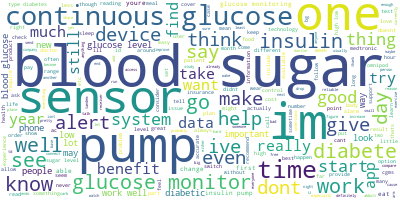

In [45]:
# Join the different processed titles together.
long_string = ','.join(list(data_ben['text_lower'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [46]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

sen = data_ben['text_lower']        
data_words = list(sent_to_words(sen))

In [47]:
print(data_words[:1][0][:30])

['think', 'important', 'pump', 'really', 'work', 'well', 'together', 'correctly', 'absolutely', 'best', 'option', 'manage', 'td']


In [48]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [49]:
# Set number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"free" + 0.014*"care" + 0.013*"coverage" + 0.011*"require" + '
  '0.009*"today" + 0.009*"depend" + 0.008*"support" + 0.008*"medical" + '
  '0.008*"customer" + 0.008*"mean"'),
 (1,
  '0.018*"get" + 0.014*"pump" + 0.013*"like" + 0.011*"time" + 0.011*"work" + '
  '0.010*"im" + 0.010*"well" + 0.010*"dont" + 0.009*"day" + 0.009*"go"'),
 (2,
  '0.025*"app" + 0.025*"phone" + 0.019*"watch" + 0.017*"alert" + 0.015*"sugar" '
  '+ 0.015*"eat" + 0.015*"alarm" + 0.011*"low" + 0.011*"apple" + '
  '0.010*"sensor"'),
 (3,
  '0.056*"glucose" + 0.046*"diabetes" + 0.029*"blood" + 0.026*"monitor" + '
  '0.024*"continuous" + 0.021*"sugar" + 0.020*"level" + 0.015*"type" + '
  '0.013*"device" + 0.012*"system"')]


In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [51]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.303453 -0.109170       1        1  54.793291
3      0.030647  0.284122       2        1  23.840037
2     -0.104967 -0.126174       3        1  13.598802
0     -0.229132 -0.048777       4        1   7.767870, topic_info=            Term         Freq        Total Category  logprob  loglift
226      glucose  2258.000000  2258.000000  Default  30.0000  30.0000
151     diabetes  1972.000000  1972.000000  Default  29.0000  29.0000
326      monitor  1031.000000  1031.000000  Default  28.0000  28.0000
87         blood  1362.000000  1362.000000  Default  27.0000  27.0000
125   continuous   947.000000   947.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
782    available    95.388292   219.630730   Topic4  -4.9220   1.7212
1961     receive    72.500963   106.228345   Topic4  -5.1964   2.1732
823     consider    69.059773    97.465936   Topic4  -5.2450   2.2106
660      provide    84.514219   250.275474   Topic4  -5.0430   1.4695
1           best    84.940981   306.150461   Topic4  -5.0380   1.2731

[221 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
38        2  0.993794  abbott
1152      1  0.997849      ac
41        2  0.993281  access
48        2  0.992147  affect
600       3  0.997223   alarm
...     ...       ...     ...
12        3  0.023995    work
1446      4  0.985882   worry
572       1  0.998948   would
575       1  0.999286    year
577       1  0.996631   youre

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

##### Finding Dominant Topic

In [52]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.8020   
1            1             2.0              0.5080   
2            2             1.0              0.4873   
3            3             3.0              0.4379   
4            4             1.0              0.9483   
5            5             3.0              0.5282   
6            6             1.0              0.4216   
7            7             3.0              0.5282   
8            8             3.0              0.4379   
9            9             1.0              0.7025   

                                                                            Keywords  \
0                               get, pump, like, time, work, im, well, dont, day, go   
1                    app, phone, watch, alert, sugar, eat, alarm, low, apple, sensor   
2                               get, pump, like, time, work, im, well, dont, day, go   
3  glucose, diabetes, blood, monitor, continuous, sugar, level, type, device, system   
4                               get, pump, like, time, work, im, well, dont, day, go   
5  glucose, diabetes, blood, monitor, continuous, sugar, level, type, device, system   
6                               get, pump, like, time, work, im, well, dont, day, go   
7  glucose, diabetes, blood, monitor, continuous, sugar, level, type, device, system   
8  glucose, diabetes, blood, monitor, continuous, sugar, level, type, device, system   
9                               get, pump, like, time, work, im, well, dont, day, go   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.  
2                                                                                                                                                     

In [53]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.5708   
1        1.0              0.9866   
2        2.0              0.9361   
3        3.0              0.7998   

                                                                            Keywords  \
0     free, care, coverage, require, today, depend, support, medical, customer, mean   
1                               get, pump, like, time, work, im, well, dont, day, go   
2                    app, phone, watch, alert, sugar, eat, alarm, low, apple, sensor   
3  glucose, diabetes, blood, monitor, continuous, sugar, level, type, device, system   

                                                                                   Representative Text  
0  I felt this way for so long. This disease sucks and no one without it can understand. The bigges...  
1  Steven Kaye decided to figure out which worked for him by rigorously tasting and testing. Steven...  
2  I had Medtronic for 18 years but switched to Tandem and will never look back! Some of the pros: ...  
3                                                                                                  NaN

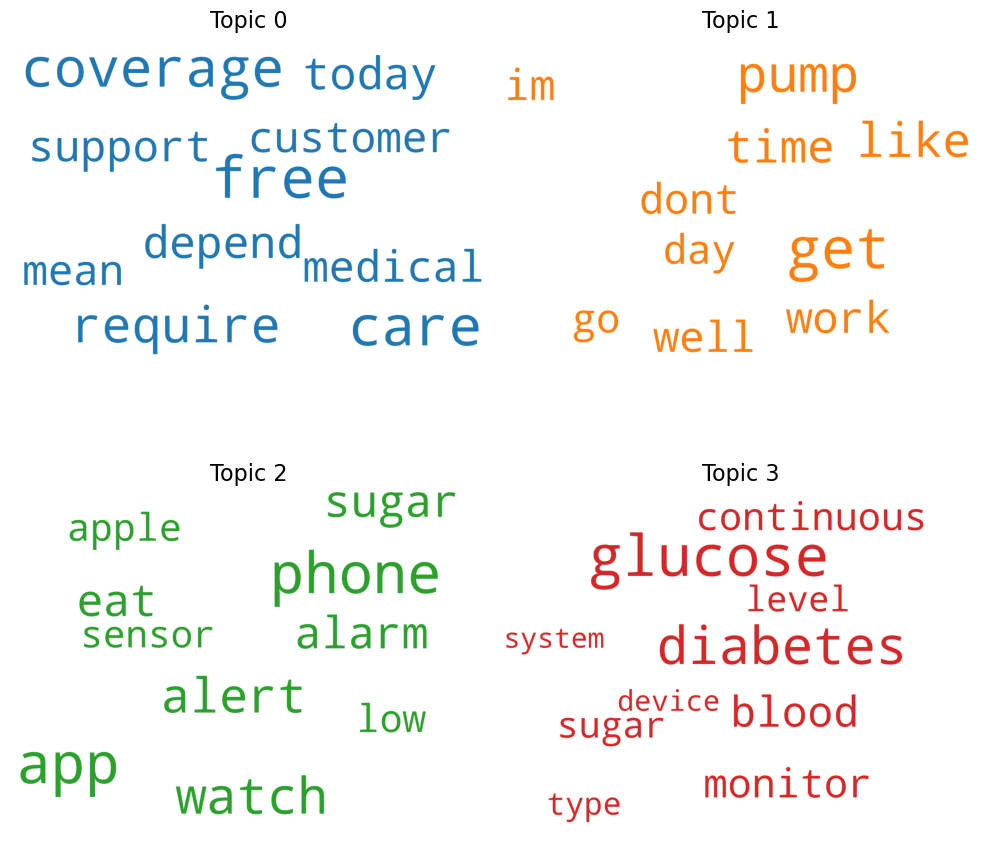

In [54]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

### What benefits are most important to diabetes patients? 
 
**- Figuring out eating choices, Interoperability, In-app Statistics**

Late blooming (LADA) T1D here. I think that CGMs are a great quality of life improvement. I have Abbott Freestyle Libre's prescribed by my diabetologist every 3 months, and they work well with Glimp[1] and any android phone with NFC - the app has nice statistics that really correlate with glycated haemoglobin (HbA1c - long term sugar level indicator) results from my checkups. You can (and should) calibrate the CGM results with prick tests in the Glimp app as well. It takes a long time testing what kind of carbohydrates work the best for you - how high / how fast your blood sugar levels rise, and how long they stay high. You have to keep yourself as close to the ideal range as possible, while are literally trying out every available carb in the pantry.

**- Unobtrusivity** 

I don’t have to prick my finger as much anymore, because I got this pump CGM (Continuous Glucose Monitor) it’s pretty much taken care of the whole pricking fingers, which is AWESOME.

**- Continual Live Monitoring**

This is big news! My CGM makes a major difference for me in managing my diabetes. The only way we’ll manage this epidemic is by enabling and empowering folks with diabetes through data and education for prevention of costly and painful complications. #fundglucosemonitors

I went through a period where I convinced myself I don’t need help. This summer I was frustrated and stopped taking it for a bit then realized how much worse that made it. Recently I started with a cgm and it opened my eyes to how bad my sugars would get depending on the food I ate. I’m about a month in and the cgm says I’m at 6.2% my last a1c was 8.1. I’ve definitely cut out a lot of my snacking which I think was keeping my numbers higher but it depends on the person for me seeing the numbers all day it keeps me motivated as a numbers person. I also think at some point he will have to face reality. He will have more side effects as time goes on especially without a diet change.!


**- Lesser Stress while managing Blood Sugar**

I now have a cgm and insulin pump which helps take the pressure off a little bit once you know if you can trust the sensor. I would recommend talking to your doctor about that. I personally did not have a sip of alcohol until I got a cgm because of the worry of it all but that won't necessarily work for you. Just be smart and be careful! It's a trip trying to figure out how diabetes works and how all the different foods and life factors affect you as well.


**- Insurance Coverage of Dexcom** 

When I was on medtronic, 5 boxes of infusion sets and reservoirs would cost me, after insurance (dme 80% covered) $ 180. Tandem costs me $ 125 for 5 boxes of infusion sets and cartridges. Medtronic cgm cost me $ 210-ish (dme) per 3 months, while everything Dexcom costs me $0 (after deductible) as my insurance covers it under prescription benefits.


### c. What unmet needs do patients have related to CGMs (something patients want but are not getting)?

In [55]:
data_neg = data.loc[(data['vader_prediction'] == 'Negative')].copy(deep = True)

In [56]:
# Remove frequent Words
frequent_words = ['cgm', 'dexcom', 'libre', 'freestyle', 'use', 'need', 'go', 'im']

def remove_frequent_words(text):
    # Split the text into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
data_neg['text_lower'] = data_neg['text_lower'].apply(remove_frequent_words)

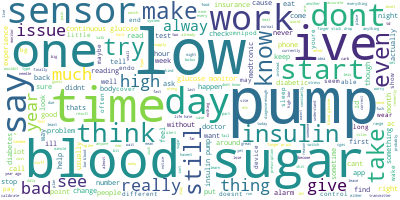

In [57]:
# Join the different processed titles together.
long_string = ','.join(list(data_neg['text_lower'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [58]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

sen = data_neg['text_lower']        
data_words = list(sent_to_words(sen))

In [59]:
print(data_words[:1][0][:30])

['ran', 'character', 'ill', 'also', 'say', 'newly', 'diagnose', 'idea', 'feel', 'react', 'etc', 'always', 'resource', 'omnipod', 'system', 'desperately', 'try', 'upgrade', 'new', 'close', 'loop', 'omnipod', 'system']


In [60]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1)]


In [61]:
# Number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"get" + 0.016*"pump" + 0.014*"day" + 0.014*"sensor" + 0.012*"one" + '
  '0.011*"ive" + 0.010*"year" + 0.010*"time" + 0.010*"dont" + 0.009*"like"'),
 (1,
  '0.026*"diabetes" + 0.024*"insulin" + 0.023*"monitor" + 0.022*"diabetic" + '
  '0.021*"type" + 0.020*"glucose" + 0.018*"continuous" + 0.015*"insurance" + '
  '0.013*"doctor" + 0.009*"pay"'),
 (2,
  '0.032*"low" + 0.021*"blood" + 0.021*"sugar" + 0.015*"high" + '
  '0.014*"insulin" + 0.013*"get" + 0.011*"take" + 0.011*"eat" + 0.010*"time" + '
  '0.010*"night"')]


In [62]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [63]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.179535  0.171860       1        1  53.245529
2     -0.140193 -0.186561       2        1  32.550887
1      0.319728  0.014701       3        1  14.203584, topic_info=         Term         Freq        Total Category  logprob  loglift
32        low  3332.000000  3332.000000  Default  30.0000  30.0000
201   insulin  2541.000000  2541.000000  Default  29.0000  29.0000
22      blood  2240.000000  2240.000000  Default  28.0000  28.0000
41      sugar  2206.000000  2206.000000  Default  27.0000  27.0000
413  diabetes  1180.000000  1180.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
89     people   347.180145   715.757230   Topic3  -4.8788   1.2282
513      test   377.861472   929.845917   Topic3  -4.7941   1.0512
156     month   362.870749   995.449518   Topic3  -4.8346   0.9425
789    manage   250.682428   633.421381   Topic3  -5.2044   1.0247
98       year   275.461715  2147.801340   Topic3  -5.1102  -0.1021

[179 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
218       2  0.998565      ac
860       3  0.995188  afford
746       1  0.004179     age
746       2  0.004179     age
746       3  0.994691     age
...     ...       ...     ...
170       1  0.711151   would
170       2  0.288691   would
98        1  0.816183    year
98        2  0.055405    year
98        3  0.128038    year

[205 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

##### Finding Dominant Topic

In [64]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.7478   
1            1             2.0              0.8310   
2            2             2.0              0.5490   
3            3             0.0              0.7139   
4            4             0.0              0.8352   
5            5             2.0              0.5741   
6            6             0.0              0.7553   
7            7             0.0              0.9650   
8            8             0.0              0.4748   
9            9             0.0              0.5497   

                                                        Keywords  \
0       get, pump, day, sensor, one, ive, year, time, dont, like   
1  low, blood, sugar, high, insulin, get, take, eat, time, night   
2  low, blood, sugar, high, insulin, get, take, eat, time, night   
3       get, pump, day, sensor, one, ive, year, time, dont, like   
4       get, pump, day, sensor, one, ive, year, time, dont, like   
5  low, blood, sugar, high, insulin, get, take, eat, time, night   
6       get, pump, day, sensor, one, ive, year, time, dont, like   
7       get, pump, day, sensor, one, ive, year, time, dont, like   
8       get, pump, day, sensor, one, ive, year, time, dont, like   
9       get, pump, day, sensor, one, ive, year, time, dont, like   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4  This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My d...  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8  It depends on what insurance I have at that time. Last year we had United healthcare and I had t...  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [65]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9900   
1        1.0              0.9585   
2        2.0              0.9831   

                                                                                  Keywords  \
0                                 get, pump, day, sensor, one, ive, year, time, dont, like   
1  diabetes, insulin, monitor, diabetic, type, glucose, continuous, insurance, doctor, pay   
2                            low, blood, sugar, high, insulin, get, take, eat, time, night   

                                                                                   Representative Text  
0  So my thoughts are: First, slap a CGM on this man. Nobody likes finger sticks and he requires a ...  
1  I initially weaned myself off of them and went several months without eating any of it. 3. If yo...  
2  My annual treatment cost in the UK: NovoRapid/Novolog: £0 Lantus: £0 Needles: £0 Glucose Test St...

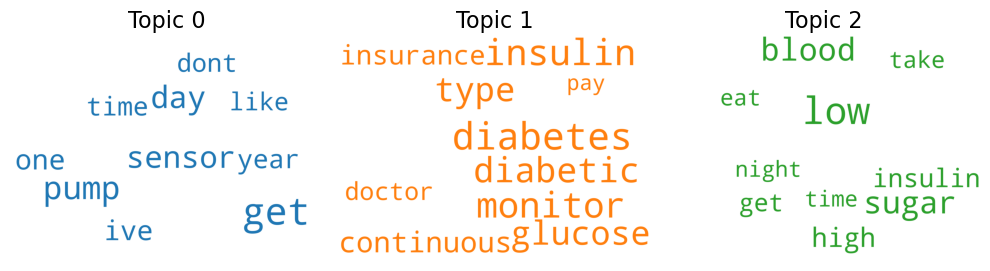

In [66]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

## Unmet needs related to CGM:
- __Reliable results:__ 
    
    'I’m sick to death of my CGM at the moment. For example today when I checked my libre 2 it told me my blood sugar was 14.9 ?? when in actual fact it was 7.8 (finger prick test). This evening it read 4.5 but I felt lower than that and yup 2.4! We can rely so heavily on these devices and it’s just so disappointing when they are dangerously inaccurate. I have decided to go back to finger prick tests and take a break from CGM.'
    

- __Durability:__ 
    
    'I just started a new CGM site a few hours ago. My pump just told me to start another sensor.'
    

- __Ease of use:__ 
    
    'none of the tubes are even remotely long enough. I can order my sets with up to 48" long tubes. But yea I'm with you, I do legs for the insulin, stomach for the CGM.'
    
    
- __Expenses and insurance coverage__:

    'I tried the pump and absolutely hated it. I just use finger pricks and MDI's. I would consider a CGM if my insurance covered it. I think that would be small enough to be acceptable, and if it gets damaged it's not saving my life, just providing additional information.'

    'I wanted to ask what has been your experience applying and getting coverage. I work at a temporary contractor and don't have drug insurance. I have been paying for my supplies, insulin and CGM (Libre) out of pocket and it's starting to become a bit too expensive. I appreciate your time, information, advise and tips! Have a great day!'
    

# 2. CGM Product-related Analysis

## a. What are praises & complaints and features of Dexcom & Freestyle Libre?

In [67]:
# Extract Dexcom-related data from'Title' and 'text_lower' columns
dexcom_data = data.loc[data['text_lower'].str.contains('dexcom') | data['Title'].str.lower().str.contains('dexcom')]
dexcom_data 

Post ID  \
0       BRDRDT2-t1_imq98sr   
1       BRDRDT2-t1_impbcf4   
2      1565738759353602048   
3        17944607459251789   
5        17875966583693003   
...                    ...   
37835   BRDRDT2-t1_imoqcl4   
37836   BRDRDT2-t1_imn1a5o   
37837   BRDRDT2-t1_imostdg   
37838   BRDRDT2-t1_imop9hf   
37840   BRDRDT2-t1_imn2fob   

                                                                                           Sound Bite Text  \
0      My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...   
1      I tried it for a little while. No side effects and it did help with insulin resistance in the AM...   
2      i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...   
3      MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...   
5      I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...   
...                                                                                                    ...   
37835  I just got switched to a Libre as well and it’s very inconsistent compared to the Dexcom I used ...   
37836  Same. Around the day 6,7,8 lately, my dexcom acts weird. Random spikes, drops, up 20 points and ...   
37837                                              Over reacting when some one grabs my arm near by Dexcom   
37838  I guess mine would be not attributing light headedness to low BG. Of course we can just check ou...   
37840  (My mom learned to inject my 10 year old self on oranges, as per nurses at the time, it was near...   

                                                                                                  Title  \
0                                   Have you been denied a second/third pump? Feeling like I messed up.   
1                                                                                             Metformin   
2                                                                                                   NaN   
3                                                                                                   NaN   
5                                                                                                   NaN   
...                                                                                                 ...   
37835                                                                             Inconsistent readings   
37836                                                                               Dexcom Trust Issues   
37837  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37838  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37840                                                               A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
5       Instagram              Original      No   No Media   
...           ...                   ...     ...        ...   
37835      Forums  Replies and Comments      No   No Media   
37836      Forums  Replies and Comments      No   No Media   
37837      Forums  Replies and Comments      No   No Media   
37838      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   

                                                                                                       URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/x3dcsh/have_you_been_denied_a_secondthird_pump_fee...   
1                                  https://www.reddit.com/r/diabetes_t1/comments/x2x5wr

In [68]:
# Extract Freestyle Libre-related data from 'Title' and 'text_lower' columns
freestylelibre_data = data.loc[(data['text_lower'].str.contains('freestyle') | data['text_lower'].str.contains('libre'))
| (data['Title'].str.lower().str.contains('freestyle') | data['Title'].str.lower().str.contains('libre'))]

freestylelibre_data

Post ID  \
7       BRDRDT2-t1_imrqfpz   
10      BRDRDT2-t1_imrg3eh   
18       BRDRDT2-t3_x3k69s   
23      BRDRDT2-t1_imspl4k   
31      BRDRDT2-t1_imsv1ll   
...                    ...   
37814   BRDRDT2-t1_imnrrk0   
37824  1565388543370870784   
37830   BRDRDT2-t1_imnpck0   
37835   BRDRDT2-t1_imoqcl4   
37841   BRDRDT2-t1_imod0qi   

                                                                                           Sound Bite Text  \
7      Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...   
10     I've tried to get it without a doctor's prescription. It's expensive as Hell. Someone on Reddit ...   
18     after months of fighting insurance and pharmacy. I can move from Libre 2 to Dexcom G6! i’m reall...   
23     Hey man - welcome to the club nobody wants to join. I highly highly recommend every newly dx’d T...   
31     I have ADHD and I was really worried the sensors would be a constant physical annoyance. I gave ...   
...                                                                                                    ...   
37814  I liked Libre a lot when I had it, but went to Dexcom for the proactive alerts that have become ...   
37824  @dclynick66 @FreeStyleLibre I’m glad you are doing well on type 1 diabetes Keep doing whatever t...   
37830  I am a type1 and to manage my glucose levels I have been using the Freestyle Libre sensor with B...   
37835  I just got switched to a Libre as well and it’s very inconsistent compared to the Dexcom I used ...   
37841  I just spoke with a rep from Abbott. The rep told me they do not yet have any plans to update to...   

                                                                                                     Title  \
7                                                                                                  Libre 3   
10     need help with a prediabetes diet. So a family member has been diagnosed with it, he cant have a...   
18                                                                                 Finally going to Dexcom   
23                                                                                 Newley diagnosed Type 1   
31                                                                     Sensor Questions/Looking for advice   
...                                                                                                    ...   
37814                                                                                              Libre 3   
37824                                                                                                  NaN   
37830                                                                     Any type1 diabetics in this sub?   
37835                                                                                Inconsistent readings   
37841                                                                             Apple IOS 16 public beta   

      Source Type             Post Type Is Paid Media Type  \
7          Forums  Replies and Comments      No   No Media   
10         Forums  Replies and Comments      No   No Media   
18         Forums              Original      No   No Media   
23         Forums  Replies and Comments      No   No Media   
31         Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37814      Forums  Replies and Comments      No   No Media   
37824     Twitter  Replies and Comments      No   No Media   
37830      Forums  Replies and Comments      No   No Media   
37835      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   

                                                                                                       URL  \
7                                  https://www.reddit.com/r/Type1Diabetes/comments/x37wug/libre_3/imrqfpz/   
10     https://www.reddit.com/r/prediabetes/comment

## Praises of Dexcom

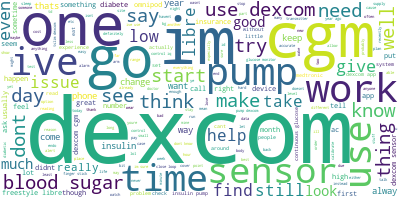

In [69]:
# Code taken from: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# Join the different processed titles together.

# Doing this to get an idea of frequent terms to remove
long_string = ','.join(list(dexcom_data['text_lower'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [70]:
# Remove frequent Words
frequent_words = ['cgm', 'dexcom', 'use', 'im', 'go']

def remove_frequent_words(text):
    # Split the text into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
dexcom_data['text_lower'] = dexcom_data['text_lower'].apply(remove_frequent_words)

In [71]:
pd.set_option('display.max_rows', 700)

dexcom_praises = dexcom_data.loc[dexcom_data['vader_prediction'] == 'Positive']
dexcom_praises

Post ID  \
0      BRDRDT2-t1_imq98sr   
1      BRDRDT2-t1_impbcf4   
3       17944607459251789   
5       17875966583693003   
7      BRDRDT2-t1_imrqfpz   
...                   ...   
37818  BRDRDT2-t1_imnivao   
37825  BRDRDT2-t1_imnpt59   
37829  BRDRDT2-t1_imomfww   
37832   BRDRDT2-t3_x3a1fe   
37834  BRDRDT2-t1_imokt58   

                                                                                           Sound Bite Text  \
0      My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...   
1      I tried it for a little while. No side effects and it did help with insulin resistance in the AM...   
3      MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...   
5      I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...   
7      Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...   
...                                                                                                    ...   
37818  i don't even celebrate easter, i'm jewish! no harm done, and a good lesson to think twice before...   
37825                                                      Yes I have the dexcom. I will look into others.   
37829  I used to have to mix Humulin N and Novolin N insulin and take it 30 mins before eating! Then I ...   
37832  Interested to hear others experiences. Kind of a vent incoming. I’m very well controlled (A1cs i...   
37834  Having an in accurate Dexcom for the first few hours can be a real pain. Especially if it starts...   

                                                                                                  Title  \
0                                   Have you been denied a second/third pump? Feeling like I messed up.   
1                                                                                             Metformin   
3                                                                                                   NaN   
5                                                                                                   NaN   
7                                                                                               Libre 3   
...                                                                                                 ...   
37818                                                               A question for the older Diabetics.   
37825                                                                                       omnipod 5 ?   
37829  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37832                                                         Staying on pump during labor and delivery   
37834                                                                     Weekly r/diabetes vent thread   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
3       Instagram              Original      No      Image   
5       Instagram              Original      No   No Media   
7          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37818      Forums  Replies and Comments      No   No Media   
37825      Forums  Replies and Comments      No   No Media   
37829      Forums  Replies and Comments      No   No Media   
37832      Forums              Original      No   No Media   
37834      Forums  Replies and Comments      No   No Media   

                                                                                                       URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/x3dcsh/have_you_been_denied_a_secondthird_pump_fee...   
1                                  https://www.reddit.com/r/diabetes_t1/comments/x2x5wr/metformin/

In [72]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

sen = dexcom_praises['text_lower']        
data_words = list(sent_to_words(sen))

In [73]:
# Find relevant keywords  
print(data_words[:1][0][:30])

['number', 'great', 'estimate', 'ac', 'ish', 'doesnt', 'care', 'say', 'want', 'actual', 'lab', 'look', 'stuff', 'take', 'word']


In [74]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [75]:
# Number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.041*"get" + 0.032*"pump" + 0.023*"year" + 0.023*"time" + 0.019*"good" + '
  '0.019*"work" + 0.015*"sugar" + 0.015*"make" + 0.015*"blood" + '
  '0.012*"really"'),
 (1,
  '0.033*"diabetes" + 0.030*"see" + 0.025*"app" + 0.020*"feel" + 0.020*"like" '
  '+ 0.020*"people" + 0.019*"always" + 0.018*"way" + 0.018*"back" + '
  '0.017*"hour"'),
 (2,
  '0.037*"sensor" + 0.032*"libre" + 0.030*"ive" + 0.029*"like" + 0.025*"one" + '
  '0.020*"much" + 0.019*"day" + 0.019*"well" + 0.012*"try" + '
  '0.012*"freestyle"'),
 (3,
  '0.063*"insulin" + 0.057*"glucose" + 0.039*"new" + 0.036*"help" + '
  '0.030*"find" + 0.028*"monitor" + 0.024*"continuous" + 0.021*"level" + '
  '0.020*"phone" + 0.019*"id"'),
 (4,
  '0.021*"say" + 0.017*"want" + 0.017*"day" + 0.015*"take" + 0.013*"look" + '
  '0.012*"need" + 0.011*"great" + 0.011*"would" + 0.011*"ac" + 0.010*"dont"')]


In [76]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [77]:
# Visualizing
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.229354  0.146003       1        1  31.327496
4      0.157003  0.049174       2        1  22.920429
2      0.117039 -0.196865       3        1  21.465648
1     -0.213777 -0.233078       4        1  14.718277
3     -0.289618  0.234766       5        1   9.568150, topic_info=             Term         Freq        Total Category  logprob  loglift
18        insulin  2504.000000  2504.000000  Default  30.0000  30.0000
239       glucose  2259.000000  2259.000000  Default  29.0000  29.0000
157        sensor  3244.000000  3244.000000  Default  28.0000  28.0000
70           pump  4128.000000  4128.000000  Default  27.0000  27.0000
113           get  6023.000000  6023.000000  Default  26.0000  26.0000
119         libre  2874.000000  2874.000000  Default  25.0000  25.0000
54            ive  2674.000000  2674.000000  Default  24.0000  24.0000
37       diabetes  2026.000000  2026.000000  Default  23.0000  23.0000
96           like  3770.000000  3770.000000  Default  22.0000  22.0000
97            new  1535.000000  1535.000000  Default  21.0000  21.0000
291          year  2998.000000  2998.000000  Default  20.0000  20.0000
124           one  2254.000000  2254.000000  Default  19.0000  19.0000
73            see  1808.000000  1808.000000  Default  18.0000  18.0000
162          time  2989.000000  2989.000000  Default  17.0000  17.0000
17           help  1409.000000  1409.000000  Default  16.0000  16.0000
104           app  1549.000000  1549.000000  Default  15.0000  15.0000
10            say  1975.000000  1975.000000  Default  14.0000  14.0000
147          good  2471.000000  2471.000000  Default  13.0000  13.0000
16           find  1196.000000  1196.000000  Default  12.0000  12.0000
164          work  2418.000000  2418.000000  Default  11.0000  11.0000
122          much  1773.000000  1773.000000  Default  10.0000  10.0000
546           day  3306.000000  3306.000000  Default   9.0000   9.0000
678       monitor  1098.000000  1098.000000  Default   8.0000   8.0000
13           want  1654.000000  1654.000000  Default   7.0000   7.0000
45           feel  1240.000000  1240.000000  Default   6.0000   6.0000
159         sugar  1981.000000  1981.000000  Default   5.0000   5.0000
68         people  1190.000000  1190.000000  Default   4.0000   4.0000
26         always  1177.000000  1177.000000  Default   3.0000   3.0000
218    continuous   944.000000   944.000000  Default   2.0000   2.0000
138         blood  1913.000000  1913.000000  Default   1.0000   1.0000
70           pump  4127.462548  4128.195241   Topic1  -3.4467   1.1605
291          year  2998.112212  2998.847122   Topic1  -3.7664   1.1604
162          time  2989.159047  2989.899163   Topic1  -3.7693   1.1604
147          good  2470.588469  2471.328018   Topic1  -3.9599   1.1604
164          work  2417.442491  2418.182556   Topic1  -3.9816   1.1604
159         sugar  1980.358316  1981.096271   Topic1  -4.1811   1.1603
138         blood  1912.302264  1913.041295   Topic1  -4.2160   1.1603
176        really  1585.570504  1586.308982   Topic1  -4.4034   1.1602
161        system  1568.794754  1569.538636   Topic1  -4.4140   1.1602
801     medtronic  1320.549401  1321.277080   Topic1  -4.5863   1.1601
607        tandem  1282.952769  1283.680718   Topic1  -4.6152   1.1601
988          love  1293.673492  1294.409744   Topic1  -4.6069   1.1601
170     insurance  1279.371068  1280.104513   Topic1  -4.6180   1.1601
142       control  1254.394867  1255.123254   Topic1  -4.6377   1.1601
163         tslim  1240.311246  1241.040202   Topic1  -4.6490   1.1601
367       omnipod  1219.915418  1220.649137   Topic1  -4.6656   1.1601
160        switch  1191.988822  1192.718226   Topic1  -4.6887   1.1601
398        change  1192.096232  1192.829557   Topic1  -4.6886   1.1601
145        device  1196.879717  1197.635630   Topic1  -4.6846   1.1600
171         month  1079.43715

In [78]:
##### Finding Dominant Topic
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             4.0              0.9500   
1            1             3.0              0.7284   
2            2             1.0              0.7827   
3            3             1.0              0.5787   
4            4             2.0              0.7219   
5            5             0.0              0.5739   
6            6             0.0              0.9366   
7            7             0.0              0.8343   
8            8             1.0              0.8068   
9            9             0.0              0.8723   

                                                                   Keywords  \
0                  say, want, day, take, look, need, great, would, ac, dont   
1  insulin, glucose, new, help, find, monitor, continuous, level, phone, id   
2           diabetes, see, app, feel, like, people, always, way, back, hour   
3           diabetes, see, app, feel, like, people, always, way, back, hour   
4            sensor, libre, ive, like, one, much, day, well, try, freestyle   
5             get, pump, year, time, good, work, sugar, make, blood, really   
6             get, pump, year, time, good, work, sugar, make, blood, really   
7             get, pump, year, time, good, work, sugar, make, blood, really   
8           diabetes, see, app, feel, like, people, always, way, back, hour   
9             get, pump, year, time, good, work, sugar, make, blood, really   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4  This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My d...  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8  It depends on what insurance I have at that time. Last year we had United healthcare and I had t...  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [79]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Identiyfing top topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9366   
1        1.0              0.8759   
2        2.0              0.9559   
3        3.0              0.7804   
4        4.0              0.9500   

                                                                   Keywords  \
0             get, pump, year, time, good, work, sugar, make, blood, really   
1           diabetes, see, app, feel, like, people, always, way, back, hour   
2            sensor, libre, ive, like, one, much, day, well, try, freestyle   
3  insulin, glucose, new, help, find, monitor, continuous, level, phone, id   
4                  say, want, day, take, look, need, great, would, ac, dont   

                                                                                   Representative Text  
0  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
1  Congrats. Im hoping for similar results when i switch to a pump in February. The concept of a st...  
2  I've used all my fingers for 20 years, they are all equally numb. (just checked, the fingers on ...  
3  I let them know that I have type 1 diabetes, and if food doesn’t arrive on time, they’ll have to...  
4  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...

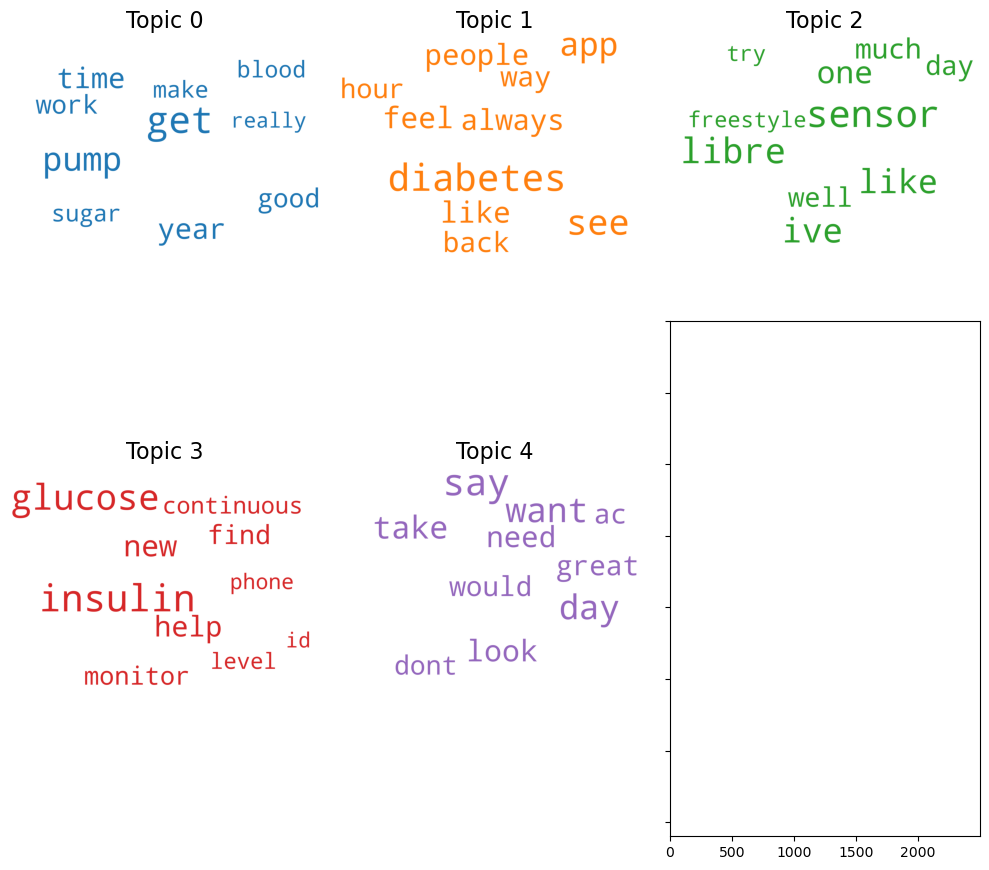

In [80]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

In [81]:
dexcom_praises = dexcom_praises.loc[dexcom_praises['vader_prediction'] == 'Positive', 'text_lower']

In [82]:
dexcom_praises

0                          number great estimate ac ish doesnt care say want actual lab look stuff take word
1                                      tried little side effect help insulin resistance find tandom superior
3        lunch ate be unit novolog insulin via pump grill chicken feta cheese carrot apple macadamia nut ...
5        id like new pancreas please typediabetes dexcomg dexcomwarrior tstrong typewarrior diabetic fitn...
7        currently impatiently wait tell canada get early currently libre happy hear fairly accurate ive ...
                                                        ...                                                 
37818    dont even celebrate easter jewish harm do good lesson think twice eat peep avoid low basal dial ...
37825                                                                                        yes look others
37829    mix humulin novolin insulin take min eat get introduce humaloglantus pen year two diagnosis blow...
37832    interested

Some praises about Dexcom include:

1. **"love my Dexcom"**: I’m so happy for you!! I love my Dexcom. I’ve had a couple of issues but I’ve had a great experience with their customer service. If you’re able to, get a few backup sensors in case one malfunctions or you have a problem with insertion.

2. **"Dexcom is the best"**: - IMO Dexcom is the best, but I have only tried one other (Medtronic) and it was years ago.

3. **Good Customer Service: "absolutely love my Dexcom"**: - I absolutely love my Dexcom, but I’ve definitely had sensors malfunction. The good news is that their customer is great and they always send replacement sensors.

4. **All in one: "Dexcom has been a lifesaver"**: - To make that long winded anecdote short, consider what CGM you like or have access to as well as whether or not your pump will have tubing or not. Dexcom has been a lifesaver literally for me. I’ve only read about the Libre but it doesn’t seem like as full featured a product and I have zero knowledge about Medtronic’s version but it’s not exactly loved if you search the sub for reviews and discussions on it.

5. **Integration with other devices: "I cannot imagine not having my Dexcom"**: - I have the newest Apple Watch and the Dexcom G6, and I have no complaints so far! I set the watch face to show my Dexcom reading so that I don't have to search for the app every time I want to check my sugar. The readings on the watch face don't automatically refresh every 5 minutes (they do refresh and I do get alerts, but it doesn't seem to happen every 5 minutes), but if I press on the reading, it will refresh. It's about 100x easier for me than using the iPhone app. I probably open the phone app about 2 or 3 times a day to review my graph, but otherwise I exclusively use the watch. Really love it - it's not cheap but for me it is so worth it and I cannot imagine not having it! 

6. **Decreasing A1C through better monitoring: "Dexcom has changed my life"**: - Dexcom has changed my life. My A1C has gone from 12.9 when I first got diagnosed 6 years ago down to normal range. It is so nice not having to worry about giving myself shots all the time when out in public.

7. **Advance warning: "I love dexcom"**: - I love dexcom and Tslim IQ control. So it will warn me that in 15 I will be going low. I now try and eat 10 skittles and set my alarm for 15 minutes.

## Complaints of Dexcom

In [83]:
# Filter to negative sentiments
dexcom_complaints = dexcom_data.loc[dexcom_data['vader_prediction'] == 'Negative']
dexcom_complaints

Post ID  \
2      1565738759353602048   
9        BRDRDT2-t3_x3grwj   
24      BRDRDT2-t1_imt7adt   
25      BRDRDT2-t1_imoxu26   
33      BRDRDT2-t1_imsr342   
...                    ...   
37812    BRDRDT2-t3_x3bn6h   
37813   BRDRDT2-t1_imoqe7h   
37836   BRDRDT2-t1_imn1a5o   
37838   BRDRDT2-t1_imop9hf   
37840   BRDRDT2-t1_imn2fob   

                                                                                           Sound Bite Text  \
2      i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...   
9      I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...   
24     I had exactly the same issue. Recently, the switch "All permissions" became available, together ...   
25     Just got a Dexcom, it's definitely helping a lot. But it is showing me how fast I bounce up and ...   
33     Honestly the pump IMO is worse than the sensor. I legit forget my Dexcom is there - I wear it on...   
...                                                                                                    ...   
37812  Do I have a bad box of cartridges? Do I need to go back to pens and needles? Between this and my...   
37813  I always shows the '---' on my homescreen. It doesn't show live readings unless I open up the de...   
37836  Same. Around the day 6,7,8 lately, my dexcom acts weird. Random spikes, drops, up 20 points and ...   
37838  I guess mine would be not attributing light headedness to low BG. Of course we can just check ou...   
37840  (My mom learned to inject my 10 year old self on oranges, as per nurses at the time, it was near...   

                                                                                                  Title  \
2                                                                                                   NaN   
9                                                                           Why do I have high bg days?   
24                       Is anyone here able to connect their Android G6 app to the Samsung Health app?   
25                                                                     Will this affect my blood sugar?   
33                                                                  Sensor Questions/Looking for advice   
...                                                                                                 ...   
37812                                                                            Equipment frustrations   
37813  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37836                                                                               Dexcom Trust Issues   
37838  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37840                                                               A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
2         Twitter  Replies and Comments      No       Link   
9          Forums              Original      No   No Media   
24         Forums  Replies and Comments      No   No Media   
25         Forums  Replies and Comments      No   No Media   
33         Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37812      Forums              Original      No   No Media   
37813      Forums  Replies and Comments      No   No Media   
37836      Forums  Replies and Comments      No   No Media   
37838      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   

                                                                                                       URL  \
2                                                   http://twitter.com/bromid/statuses/1565738759353602048   
9                         https://www.reddit.com/r/diabetes_t1/comments/x3grwj/why_do_i

In [84]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

sen = dexcom_complaints['text_lower']        
data_words = list(sent_to_words(sen))

In [85]:
# Find relevant keywords  
print(data_words[:1][0][:30])

['ran', 'character', 'ill', 'also', 'say', 'newly', 'diagnose', 'idea', 'feel', 'react', 'etc', 'always', 'resource', 'omnipod', 'system', 'desperately', 'try', 'upgrade', 'new', 'close', 'loop', 'omnipod', 'system']


In [86]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1)]


In [87]:
# Code taken from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"month" + 0.025*"night" + 0.025*"year" + 0.025*"phone" + 0.017*"want" '
  '+ 0.016*"sleep" + 0.016*"diabetes" + 0.016*"ac" + 0.015*"wake" + '
  '0.014*"diabetic"'),
 (1,
  '0.054*"low" + 0.032*"blood" + 0.029*"sugar" + 0.022*"app" + 0.021*"hour" + '
  '0.017*"start" + 0.014*"minute" + 0.014*"glucose" + 0.013*"issue" + '
  '0.012*"read"'),
 (2,
  '0.033*"get" + 0.017*"ive" + 0.017*"like" + 0.017*"one" + 0.016*"dont" + '
  '0.015*"pump" + 0.013*"try" + 0.011*"need" + 0.011*"make" + 0.011*"know"'),
 (3,
  '0.039*"sensor" + 0.033*"time" + 0.023*"day" + 0.020*"libre" + 0.017*"work" '
  '+ 0.016*"last" + 0.012*"finger" + 0.012*"every" + 0.012*"transmitter" + '
  '0.012*"get"')]


In [88]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [89]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.279179  0.156774       1        1  39.529116
3     -0.126080 -0.209596       2        1  28.297402
1      0.219807  0.219652       3        1  17.966660
0      0.185452 -0.166829       4        1  14.206822, topic_info=             Term         Freq        Total Category  logprob  loglift
207           low  1596.000000  1596.000000  Default  30.0000  30.0000
115        sensor  1810.000000  1810.000000  Default  29.0000  29.0000
146          time  1545.000000  1545.000000  Default  28.0000  28.0000
323         blood   947.000000   947.000000  Default  27.0000  27.0000
393         sugar   847.000000   847.000000  Default  26.0000  26.0000
166         month   666.000000   666.000000  Default  25.0000  25.0000
149          year  1034.000000  1034.000000  Default  24.0000  24.0000
411         libre   939.000000   939.000000  Default  23.0000  23.0000
29            get  2679.000000  2679.000000  Default  22.0000  22.0000
168         night   583.000000   583.000000  Default  21.0000  21.0000
722         phone   576.000000   576.000000  Default  20.0000  20.0000
56            app   654.000000   654.000000  Default  19.0000  19.0000
132          hour   618.000000   618.000000  Default  18.0000  18.0000
33           like  1085.000000  1085.000000  Default  17.0000  17.0000
66            one  1082.000000  1082.000000  Default  16.0000  16.0000
147          work   786.000000   786.000000  Default  15.0000  15.0000
23            day  1657.000000  1657.000000  Default  14.0000  14.0000
26           dont  1049.000000  1049.000000  Default  13.0000  13.0000
135          last   737.000000   737.000000  Default  12.0000  12.0000
176          want   398.000000   398.000000  Default  11.0000  11.0000
72          start   617.000000   617.000000  Default  10.0000  10.0000
19            try   819.000000   819.000000  Default   9.0000   9.0000
173         sleep   382.000000   382.000000  Default   8.0000   8.0000
265      diabetes   371.000000   371.000000  Default   7.0000   7.0000
151            ac   365.000000   365.000000  Default   6.0000   6.0000
363        minute   412.000000   412.000000  Default   5.0000   5.0000
437        finger   561.000000   561.000000  Default   4.0000   4.0000
105         every   560.000000   560.000000  Default   3.0000   3.0000
61        glucose   408.000000   408.000000  Default   2.0000   2.0000
1035  transmitter   544.000000   544.000000  Default   1.0000   1.0000
66            one  1081.695883  1082.446274   Topic1  -4.0934   0.9274
33           like  1085.020405  1085.779978   Topic1  -4.0903   0.9274
26           dont  1049.129136  1049.879511   Topic1  -4.1239   0.9274
19            try   818.610728   819.363721   Topic1  -4.3720   0.9272
32           know   707.691682   708.438945   Topic1  -4.5176   0.9271
210          need   715.636334   716.399276   Topic1  -4.5065   0.9271
217        really   661.368044   662.123558   Topic1  -4.5853   0.9270
17            say   632.292179   633.030537   Topic1  -4.6303   0.9270
31           high   647.419191   648.177748   Topic1  -4.6066   0.9270
99          think   632.972047   633.722135   Topic1  -4.6292   0.9269
28           even   618.177812   618.930944   Topic1  -4.6529   0.9269
73          still   603.267761   604.032432   Topic1  -4.6773   0.9269
570          give   589.564974   590.318264   Topic1  -4.7003   0.9269
11            new   569.713427   570.472011   Topic1  -4.7345   0.9268
1          always   556.844066   557.603574   Topic1  -4.7574   0.9268
7            feel   512.743782   513.494132   Topic1  -4.8399   0.9267
556         first   524.886236   525.658410   Topic1  -4.8165   0.9267
80            bad   489.399874   490.155285   Topic1  -4.8865   0.9266
211         never   469.201056   469.947761   Topic1  -4.9286   0.9265
83         change   461.128781   461.877004   Topic1  -4.9460   0.9265
34          

##### Finding dominant topic

In [90]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.6383   
1            1             2.0              0.8364   
2            2             1.0              0.5300   
3            3             2.0              0.9390   
4            4             3.0              0.6972   
5            5             3.0              0.7797   
6            6             0.0              0.4447   
7            7             1.0              0.5491   
8            8             1.0              0.4548   
9            9             2.0              0.8862   

                                                                Keywords  \
0                 get, ive, like, one, dont, pump, try, need, make, know   
1                 get, ive, like, one, dont, pump, try, need, make, know   
2      low, blood, sugar, app, hour, start, minute, glucose, issue, read   
3                 get, ive, like, one, dont, pump, try, need, make, know   
4  sensor, time, day, libre, work, last, finger, every, transmitter, get   
5  sensor, time, day, libre, work, last, finger, every, transmitter, get   
6   month, night, year, phone, want, sleep, diabetes, ac, wake, diabetic   
7      low, blood, sugar, app, hour, start, minute, glucose, issue, read   
8      low, blood, sugar, app, hour, start, minute, glucose, issue, read   
9                 get, ive, like, one, dont, pump, try, need, make, know   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4  This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My d...  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8  It depends on what insurance I have at that time. Last year we had United healthcare and I had t...  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [91]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Attach Dominant Topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9345   
1        1.0              0.8560   
2        2.0              0.9390   
3        3.0              0.9527   

                                                                Keywords  \
0   month, night, year, phone, want, sleep, diabetes, ac, wake, diabetic   
1      low, blood, sugar, app, hour, start, minute, glucose, issue, read   
2                 get, ive, like, one, dont, pump, try, need, make, know   
3  sensor, time, day, libre, work, last, finger, every, transmitter, get   

                                                                                   Representative Text  
0  I stabbed myself with those stupid lancets way too many times Are those the delica lancets? Beca...  
1  i’m on tslim and have never used a pod but i can answer a few Qs here. the omnipod 5 now integra...  
2  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
3  I have the Medtronic pump with a CGM ( Continuous glucose monitor) that checks blood sugars ever...

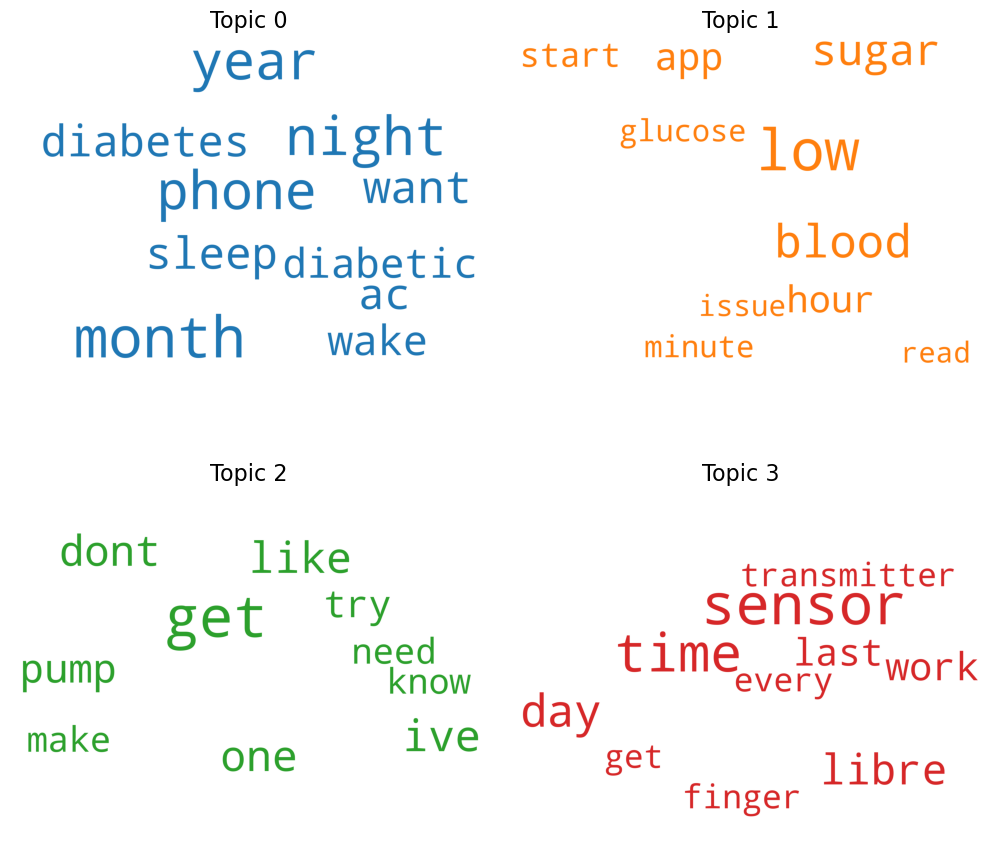

In [92]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

In [93]:
dexcom_comp = dexcom_complaints.loc[dexcom_complaints['vader_prediction'] == 'Negative', 'text_lower']

In [94]:
dexcom_comp

2        ran character youtuberwglpdhqim ill also say newly diagnose idea feel react etc always resource ...
9        tslim pump usually number today theyve get stick dont know even run workout gym number didnt sta...
24       exactly issue recently switch permission become available together another one glucose reading y...
25       get definitely help lot show fast bounce thats try change way eat still little nervous get pump ...
33       honestly pump imo worse sensor legit forget wear thigh seriously cant feel hand pump stick get u...
                                                        ...                                                 
37812    bad box cartridge need back pen needle previous three dexcoms last day ready switch back ancient...
37813    always show homescreen doesnt show live reading unless open app wait minute number show iwatch suck
37836    around day lately act weird random spike drop point next least austria call soon completly fuck ...
37838    guess mine

Some complaints about Dexcom include:

1. **"Dexcom sensors failing from hot baths"**: Recently I've been getting a lot of sensor failures. I think it might be caused by taking hot baths at 40C. I'm not sure if it is a coincidence or not. Has anyone had a similar experience?!

2. **"My Dexcom died"**: *sigh* the life of a diabetic. My Dexcom died when I was camping in the middle of the woods a few weeks ago. One of the rare times I didn't have a backup. Scary.

3. **"Dexcom issues and alternatives!"**: So my dexcom has been doing nose dives, from 130 to 70 in back to back reading. When I do finger prick I get 120. Now I'm getting "temporary issues" wait 3 hours.

4. **"Dexcom customer service"**: I had a terrible experience with Dexcom customer service. The representative was rude and unhelpful, and it took over an hour to resolve my issue.

5. **"Low Dexcom readings with arm placement?"**: In my experience, Dexcom readings in the first 24 hours are a little inaccurate. I usually calibrate it once and let it work itself out. If I continue to get inaccurate numbers after 24 hours or if the discrepancy is over 50-60 points, I call Dexcom to get a replacement.

6. **"Dexcom transmitter issues"**: I’m having issues connecting my daughter’s phone to the dexcom transmitter. We have the little handheld device that connected just fine, but I cannot get her phone to connect. It just spins and then says it can’t connect.

7. **"Dexcom insurance issues"**: I've had issues with my insurance not covering the cost of my Dexcom sensors, which are essential for managing my diabetes.

## Features of Dexcom

In [95]:
# Create word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def createWordCloud(text):
    wordcloud = WordCloud(collocations = False, background_color = 'white', width=1200, height=600).generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")    
    plt.show()

In [96]:
def get_noun_phrases(text):
    blob = TextBlob(text)
    noun_phrases = blob.noun_phrases
    return noun_phrases


dexcom_data['noun_phrases'] = dexcom_data['text_lower'].apply(get_noun_phrases)
dexcom_data

Post ID  \
0       BRDRDT2-t1_imq98sr   
1       BRDRDT2-t1_impbcf4   
2      1565738759353602048   
3        17944607459251789   
5        17875966583693003   
...                    ...   
37835   BRDRDT2-t1_imoqcl4   
37836   BRDRDT2-t1_imn1a5o   
37837   BRDRDT2-t1_imostdg   
37838   BRDRDT2-t1_imop9hf   
37840   BRDRDT2-t1_imn2fob   

                                                                                           Sound Bite Text  \
0      My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...   
1      I tried it for a little while. No side effects and it did help with insulin resistance in the AM...   
2      i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...   
3      MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...   
5      I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...   
...                                                                                                    ...   
37835  I just got switched to a Libre as well and it’s very inconsistent compared to the Dexcom I used ...   
37836  Same. Around the day 6,7,8 lately, my dexcom acts weird. Random spikes, drops, up 20 points and ...   
37837                                              Over reacting when some one grabs my arm near by Dexcom   
37838  I guess mine would be not attributing light headedness to low BG. Of course we can just check ou...   
37840  (My mom learned to inject my 10 year old self on oranges, as per nurses at the time, it was near...   

                                                                                                  Title  \
0                                   Have you been denied a second/third pump? Feeling like I messed up.   
1                                                                                             Metformin   
2                                                                                                   NaN   
3                                                                                                   NaN   
5                                                                                                   NaN   
...                                                                                                 ...   
37835                                                                             Inconsistent readings   
37836                                                                               Dexcom Trust Issues   
37837  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37838  If you were magically cured of type I diabetes today, what habits would be the hardest to break?   
37840                                                               A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
5       Instagram              Original      No   No Media   
...           ...                   ...     ...        ...   
37835      Forums  Replies and Comments      No   No Media   
37836      Forums  Replies and Comments      No   No Media   
37837      Forums  Replies and Comments      No   No Media   
37838      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   

                                                                                                       URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/x3dcsh/have_you_been_denied_a_secondthird_pump_fee...   
1                                  https://www.reddit.com/r/diabetes_t1/comments/x2x5wr

In [97]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
sen = dexcom_data['noun_phrases']
data_words = list(sent_to_words(sen))

In [98]:
print(data_words[:1][0][:30])

['great', 'estimate', 'ac', 'ish', 'doesnt', 'care', 'actual', 'lab', 'look', 'stuff']


In [99]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [100]:
# Code taken from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"pump" + 0.028*"time" + 0.025*"blood" + 0.024*"sugar" + 0.023*"work" '
  '+ 0.023*"year" + 0.022*"ive" + 0.017*"dont" + 0.017*"low" + 0.017*"good"'),
 (1,
  '0.051*"sensor" + 0.039*"libre" + 0.031*"glucose" + 0.024*"app" + '
  '0.021*"new" + 0.020*"phone" + 0.016*"freestyle" + 0.015*"monitor" + '
  '0.014*"issue" + 0.013*"device"'),
 (2,
  '0.061*"day" + 0.019*"insurance" + 0.018*"insulin" + 0.018*"high" + '
  '0.017*"ac" + 0.015*"need" + 0.015*"month" + 0.014*"endo" + 0.014*"night" + '
  '0.013*"test"'),
 (3,
  '0.051*"diabetes" + 0.026*"hour" + 0.025*"type" + 0.013*"long" + 0.013*"td" '
  '+ 0.011*"bolus" + 0.011*"place" + 0.010*"food" + 0.010*"minute" + '
  '0.009*"real"')]


In [101]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [102]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.222851  0.227207       1        1  36.764361
1      0.177400 -0.305804       2        1  27.429384
2     -0.106683  0.142815       3        1  21.289919
3     -0.293568 -0.064219       4        1  14.516336, topic_info=             Term         Freq        Total Category  logprob  loglift
88            day  4199.000000  4199.000000  Default  30.0000  30.0000
120        sensor  4458.000000  4458.000000  Default  29.0000  29.0000
51           pump  4640.000000  4640.000000  Default  28.0000  28.0000
28       diabetes  2359.000000  2359.000000  Default  27.0000  27.0000
82          libre  3440.000000  3440.000000  Default  26.0000  26.0000
162       glucose  2755.000000  2755.000000  Default  25.0000  25.0000
123          time  3328.000000  3328.000000  Default  24.0000  24.0000
109         blood  2954.000000  2954.000000  Default  23.0000  23.0000
121         sugar  2793.000000  2793.000000  Default  22.0000  22.0000
124          work  2762.000000  2762.000000  Default  21.0000  21.0000
75            app  2130.000000  2130.000000  Default  20.0000  20.0000
69            new  1871.000000  1871.000000  Default  19.0000  19.0000
40           hour  1195.000000  1195.000000  Default  18.0000  18.0000
233         phone  1783.000000  1783.000000  Default  17.0000  17.0000
345          type  1162.000000  1162.000000  Default  16.0000  16.0000
128     insurance  1328.000000  1328.000000  Default  15.0000  15.0000
169           low  2037.000000  2037.000000  Default  14.0000  14.0000
218          year  3092.000000  3092.000000  Default  13.0000  13.0000
91           high  1211.000000  1211.000000  Default  12.0000  12.0000
161     freestyle  1392.000000  1392.000000  Default  11.0000  11.0000
122        switch  1777.000000  1777.000000  Default  10.0000  10.0000
0              ac  1135.000000  1135.000000  Default   9.0000   9.0000
491       monitor  1343.000000  1343.000000  Default   8.0000   8.0000
448        tandem  1656.000000  1656.000000  Default   7.0000   7.0000
81            ive  3293.000000  3293.000000  Default   6.0000   6.0000
80          issue  1248.000000  1248.000000  Default   5.0000   5.0000
20         system  1615.000000  1615.000000  Default   4.0000   4.0000
129         month  1016.000000  1016.000000  Default   3.0000   3.0000
324          need  2084.000000  2084.000000  Default   2.0000   2.0000
102         tslim  1536.000000  1536.000000  Default   1.0000   1.0000
51           pump  4640.026649  4640.739275   Topic1  -3.2361   1.0005
123          time  3327.326259  3328.060349   Topic1  -3.5687   1.0004
109         blood  2953.660787  2954.391897   Topic1  -3.6878   1.0004
121         sugar  2792.987299  2793.715628   Topic1  -3.7438   1.0004
124          work  2761.997482  2762.786483   Topic1  -3.7549   1.0004
169           low  2036.650093  2037.379887   Topic1  -4.0596   1.0003
122        switch  1776.298456  1777.022665   Topic1  -4.1963   1.0002
448        tandem  1655.446061  1656.165212   Topic1  -4.2668   1.0002
20         system  1614.736410  1615.467897   Topic1  -4.2917   1.0002
102         tslim  1535.827359  1536.530067   Topic1  -4.3418   1.0002
111       control  1469.178291  1469.884597   Topic1  -4.3862   1.0002
570     medtronic  1444.686683  1445.388974   Topic1  -4.4030   1.0002
18        omnipod  1394.439657  1395.159718   Topic1  -4.4384   1.0001
92            lot  1289.398178  1290.124461   Topic1  -4.5167   1.0001
738        finger  1239.059483  1239.809573   Topic1  -4.5565   1.0000
672         alarm   933.256986   933.988001   Topic1  -4.8399   0.9999
212          life   864.911866   865.638908   Topic1  -4.9160   0.9998
146            bg   848.844297   849.596931   Topic1  -4.9347   0.9998
115        manage   858.062972   858.833566   Topic1  -4.9239   0.9997
5           great   791.489416   792.228179   Topic1  -5.0047   0.9997
187         

##### Finding dominant topic

In [103]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=dexcom_data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.8408   
1            1             0.0              0.6264   
2            2             0.0              0.8097   
3            3             3.0              0.7953   
4            4             3.0              0.6904   
5            5             1.0              0.8749   
6            6             2.0              0.6635   
7            7             1.0              0.4569   
8            8             0.0              0.9326   
9            9             2.0              0.4376   

                                                                     Keywords  \
0           day, insurance, insulin, high, ac, need, month, endo, night, test   
1                  pump, time, blood, sugar, work, year, ive, dont, low, good   
2                  pump, time, blood, sugar, work, year, ive, dont, low, good   
3            diabetes, hour, type, long, td, bolus, place, food, minute, real   
4            diabetes, hour, type, long, td, bolus, place, food, minute, real   
5  sensor, libre, glucose, app, new, phone, freestyle, monitor, issue, device   
6           day, insurance, insulin, high, ac, need, month, endo, night, test   
7  sensor, libre, glucose, app, new, phone, freestyle, monitor, issue, device   
8                  pump, time, blood, sugar, work, year, ive, dont, low, good   
9           day, insurance, insulin, high, ac, need, month, endo, night, test   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4                                                                                                  NaN  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6                                                                                                  NaN  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8                                                                                                  NaN  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [104]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9592   
1        1.0              0.9604   
2        2.0              0.9476   
3        3.0              0.9618   

                                                                     Keywords  \
0                  pump, time, blood, sugar, work, year, ive, dont, low, good   
1  sensor, libre, glucose, app, new, phone, freestyle, monitor, issue, device   
2           day, insurance, insulin, high, ac, need, month, endo, night, test   
3            diabetes, hour, type, long, td, bolus, place, food, minute, real   

                                                                                   Representative Text  
0  I know it’s really frustrating, every month I place a refill I just hope nothing changes on insu...  
1                                                                                                  NaN  
2  Thanks a bunch I’m usually hit or miss with reactions to adhesive but I’ve heard about the dexco...  
3                                                                                                  NaN

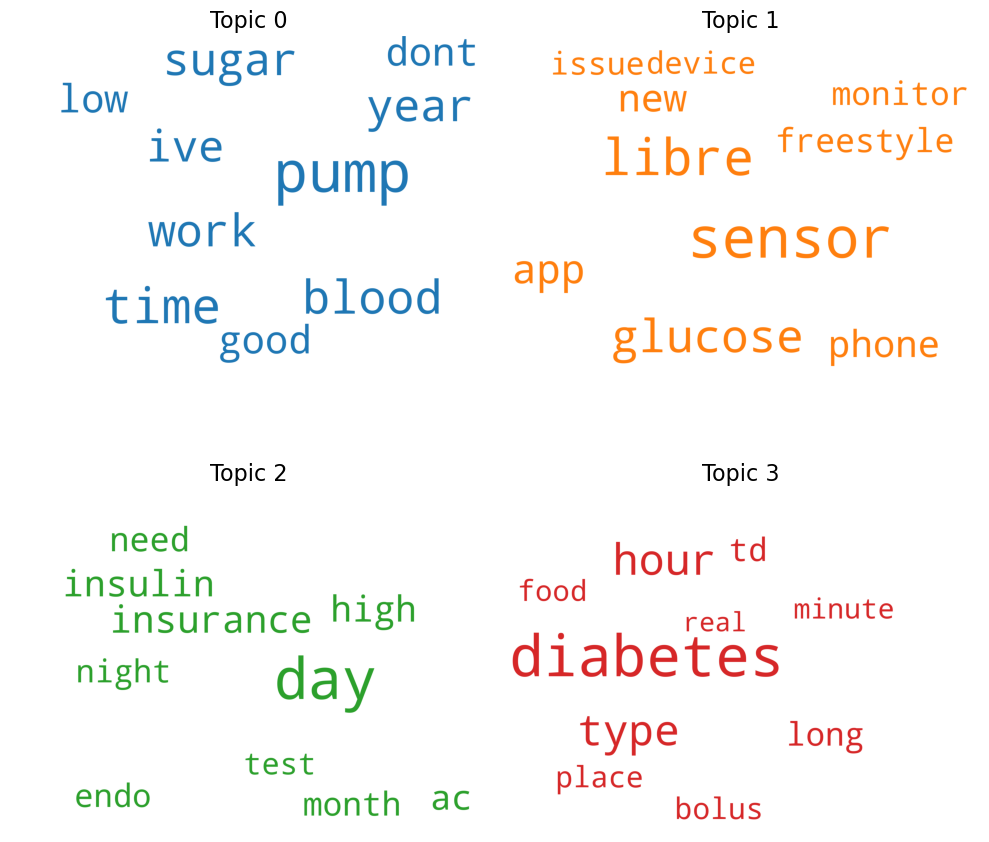

In [105]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

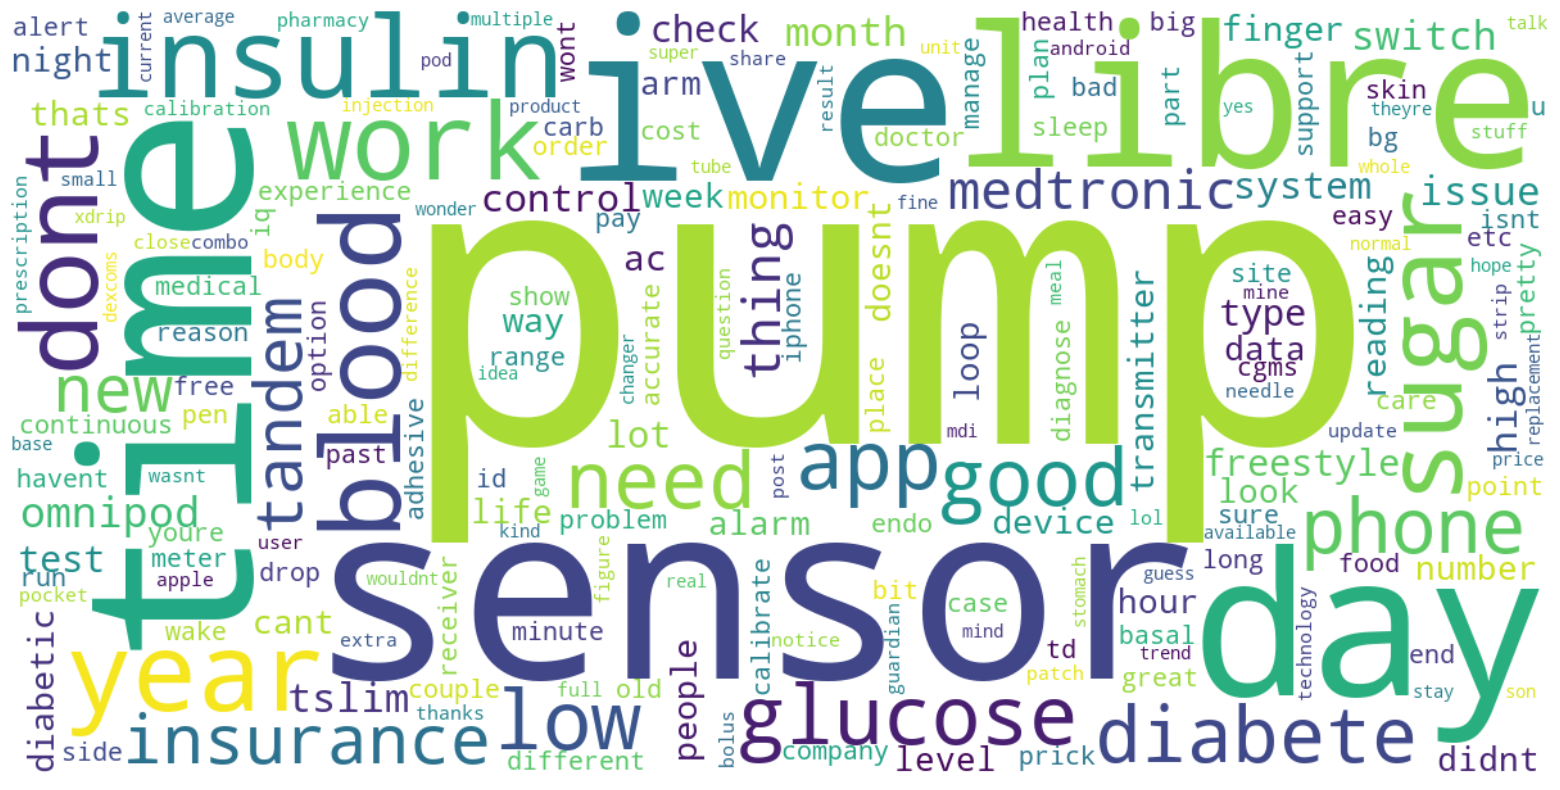

In [106]:
wordlist = []
for x in dexcom_data['noun_phrases']:
    wordlist.extend(x)

createWordCloud(' '.join(wordlist))

**1. Dexcom Sensors**:
"dexcom sensors continuously monitor glucose levels throughout the day and night, providing real-time data to me."
"designed to be worn comfortably and discreetly. Have a wear time of up to 10 days, reducing the need for frequent sensor changes."

**2. Compatibility with insulin pumps**:
"Dexcom CGM systems can be integrated with insulin pumps, which allows for more accurate insulin dosing and can help improve diabetes management."

**3. Data Sharing**:
"Dexcom CGM systems can be connected to compatible devices and apps, which allow users to share their glucose data with healthcare providers, caregivers, and my family members!!"

## Praises of Freestyle Libre

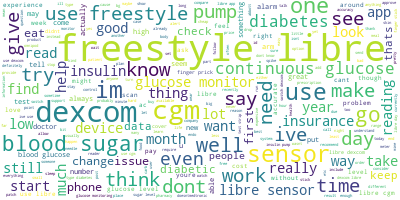

In [107]:
# Code taken from: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# Join the different processed titles together.

# Find frequently occuring words
long_string = ','.join(list(freestylelibre_data['text_lower'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [108]:
# Remove frequent Words
frequent_words = ['freestyle','libre', 'dexcom' ,'cgm', 'dexcom', 'use', 'glucose', 'im']

def remove_frequent_words(text):
    # Split the text into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
freestylelibre_data['text_lower'] = freestylelibre_data['text_lower'].apply(remove_frequent_words)

In [109]:
# Filtering to positive sentiment data
free_praises = freestylelibre_data.loc[freestylelibre_data['vader_prediction'] == 'Positive']
free_praises

Post ID  \
7       BRDRDT2-t1_imrqfpz   
18       BRDRDT2-t3_x3k69s   
23      BRDRDT2-t1_imspl4k   
36      BRDRDT2-t1_imtbfv3   
37      BRDRDT2-t1_imp028v   
...                    ...   
37811    17952676675961184   
37814   BRDRDT2-t1_imnrrk0   
37824  1565388543370870784   
37830   BRDRDT2-t1_imnpck0   
37841   BRDRDT2-t1_imod0qi   

                                                                                           Sound Bite Text  \
7      Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...   
18     after months of fighting insurance and pharmacy. I can move from Libre 2 to Dexcom G6! i’m reall...   
23     Hey man - welcome to the club nobody wants to join. I highly highly recommend every newly dx’d T...   
36     I use Dexcom, not libre, but I have my wife put mine on my back under my shoulder blades. It nev...   
37     I have the freestyle libre 14 day sensor, r they the same to the libre s 3? Or r they the same t...   
...                                                                                                    ...   
37811  Happy birthday to my sister that turned 1 year today it's been so good have 2 sisters and l love...   
37814  I liked Libre a lot when I had it, but went to Dexcom for the proactive alerts that have become ...   
37824  @dclynick66 @FreeStyleLibre I’m glad you are doing well on type 1 diabetes Keep doing whatever t...   
37830  I am a type1 and to manage my glucose levels I have been using the Freestyle Libre sensor with B...   
37841  I just spoke with a rep from Abbott. The rep told me they do not yet have any plans to update to...   

                                  Title Source Type             Post Type  \
7                               Libre 3      Forums  Replies and Comments   
18              Finally going to Dexcom      Forums              Original   
23              Newley diagnosed Type 1      Forums  Replies and Comments   
36                         Libre Sensor      Forums  Replies and Comments   
37                              Libre 3      Forums  Replies and Comments   
...                                 ...         ...                   ...   
37811                               NaN   Instagram              Original   
37814                           Libre 3      Forums  Replies and Comments   
37824                               NaN     Twitter  Replies and Comments   
37830  Any type1 diabetics in this sub?      Forums  Replies and Comments   
37841          Apple IOS 16 public beta      Forums  Replies and Comments   

      Is Paid    Media Type  \
7          No      No Media   
18         No      No Media   
23         No      No Media   
36         No      No Media   
37         No      No Media   
...       ...           ...   
37811      No  Video; Image   
37814      No      No Media   
37824      No      No Media   
37830      No      No Media   
37841      No      No Media   

                                                                                               URL  \
7                          https://www.reddit.com/r/Type1Diabetes/comments/x37wug/libre_3/imrqfpz/   
18                   https://www.reddit.com/r/diabetes_t1/comments/x3k69s/finally_going_to_dexcom/   
23              https://www.reddit.com/r/diabetes/comments/x41r9p/newley_diagnosed_type_1/imspl4k/   
36                         https://www.reddit.com/r/diabetes/comments/x412a4/libre_sensor/imtbfv3/   
37                         https://www.reddit.com/r/Type1Diabetes/comments/x37wug/libre_3/imp028v/   
...                                                                                            ...   
37811                                                     https://www.instagram.com/p/Ch7fcfatleR/   
37814                      https://www.reddit.com/r/Type1Diabetes/comments/x37wug/libre_3/imnrrk0/   
37824                              http://twitter.com/Sharonlynne1964/statuses/1565388543370870784   
37830  https://www.

In [110]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
sen = free_praises['text_lower']
data_words = list(sent_to_words(sen))

In [111]:
print(data_words[:1][0][:30])

['currently', 'impatiently', 'wait', 'tell', 'canada', 'get', 'early', 'currently', 'happy', 'hear', 'fairly', 'accurate', 'ive', 'past', 'issue', 'like', 'app', 'well', 'dexcoms', 'lol', 'gon', 'na', 'awesome', 'much', 'small', 'approved', 'location', 'body', 'one']


In [112]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [113]:
# Code taken from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"freestylelibre" + 0.014*"td" + 0.013*"skin" + 0.010*"diabetes" + '
  '0.009*"god" + 0.009*"patch" + 0.008*"diabetic" + 0.007*"adhesive" + '
  '0.006*"fat" + 0.005*"site"'),
 (1,
  '0.044*"diabetes" + 0.027*"continuous" + 0.022*"monitor" + 0.020*"level" + '
  '0.019*"system" + 0.016*"device" + 0.013*"people" + 0.012*"type" + '
  '0.011*"health" + 0.010*"monitoring"'),
 (2,
  '0.017*"get" + 0.013*"sensor" + 0.011*"like" + 0.010*"day" + 0.010*"go" + '
  '0.009*"blood" + 0.009*"time" + 0.008*"sugar" + 0.008*"one" + 0.007*"well"')]


In [114]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [115]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.311595  0.021423       1        1  78.309955
1      0.131672 -0.218231       2        1  15.525548
0      0.179923  0.196808       3        1   6.164498, topic_info=                 Term         Freq        Total Category  logprob  loglift
456          diabetes  1654.000000  1654.000000  Default  30.0000  30.0000
65         continuous  1003.000000  1003.000000  Default  29.0000  29.0000
597           monitor  1317.000000  1317.000000  Default  28.0000  28.0000
563             level  1050.000000  1050.000000  Default  27.0000  27.0000
45             system   726.000000   726.000000  Default  26.0000  26.0000
67             device   747.000000   747.000000  Default  25.0000  25.0000
278            people   762.000000   762.000000  Default  24.0000  24.0000
68           diabetic   643.000000   643.000000  Default  23.0000  23.0000
211              type   770.000000   770.000000  Default  22.0000  22.0000
519            health   367.000000   367.000000  Default  21.0000  21.0000
10                get  2887.000000  2887.000000  Default  20.0000  20.0000
112        monitoring   338.000000   338.000000  Default  19.0000  19.0000
1342   freestylelibre   205.000000   205.000000  Default  18.0000  18.0000
1138          program   296.000000   296.000000  Default  17.0000  17.0000
586           medical   288.000000   288.000000  Default  16.0000  16.0000
543       information   299.000000   299.000000  Default  15.0000  15.0000
171            sensor  2159.000000  2159.000000  Default  14.0000  14.0000
813                td   178.000000   178.000000  Default  13.0000  13.0000
212            abbott   298.000000   298.000000  Default  12.0000  12.0000
1378             skin   175.000000   175.000000  Default  11.0000  11.0000
1730            carbs   261.000000   261.000000  Default  10.0000  10.0000
1027          patient   257.000000   257.000000  Default   9.0000   9.0000
749        technology   253.000000   253.000000  Default   8.0000   8.0000
176         available   312.000000   312.000000  Default   7.0000   7.0000
17               like  1813.000000  1813.000000  Default   6.0000   6.0000
170               day  1741.000000  1741.000000  Default   5.0000   5.0000
445              data   478.000000   478.000000  Default   4.0000   4.0000
1751           friend   192.000000   192.000000  Default   3.0000   3.0000
250                go  1617.000000  1617.000000  Default   2.0000   2.0000
963           provide   199.000000   199.000000  Default   1.0000   1.0000
10                get  2887.331367  2887.994398   Topic1  -4.0520   0.2443
171            sensor  2158.836521  2159.547337   Topic1  -4.3428   0.2442
17               like  1812.750974  1813.452082   Topic1  -4.5175   0.2441
170               day  1740.417568  1741.118454   Topic1  -4.5582   0.2441
250                go  1616.391727  1617.071052   Topic1  -4.6321   0.2441
311              time  1439.152588  1439.852050   Topic1  -4.7483   0.2440
22                one  1248.012042  1248.724193   Topic1  -4.8908   0.2439
800             would  1157.171650  1157.834101   Topic1  -4.9664   0.2439
159              also  1187.820551  1188.548385   Topic1  -4.9402   0.2439
156              work  1119.069150  1119.762937   Topic1  -4.9998   0.2439
735             sugar  1300.251564  1301.061000   Topic1  -4.8498   0.2439
236              dont  1051.959317  1052.624271   Topic1  -5.0617   0.2439
27               well  1195.478060  1196.235061   Topic1  -4.9338   0.2439
251              good  1049.264404  1049.942593   Topic1  -5.0642   0.2438
360              know  1029.099843  1029.774362   Topic1  -5.0837   0.2438
16                ive   952.503880   953.139441   Topic1  -5.1610   0.2438
157              year  1135.201201  1135.962725   Topic1  -4.9855   0.2438
108              make  1067.882973  1068.618036   Topic1  -5.0467   0.2438
132         

##### Finding dominant topic

In [116]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.9369   
1            1             2.0              0.9602   
2            2             2.0              0.8638   
3            3             2.0              0.9422   
4            4             2.0              0.8333   
5            5             2.0              0.8231   
6            6             2.0              0.9698   
7            7             2.0              0.8963   
8            8             2.0              0.9460   
9            9             2.0              0.9164   

                                                    Keywords  \
0  get, sensor, like, day, go, blood, time, sugar, one, well   
1  get, sensor, like, day, go, blood, time, sugar, one, well   
2  get, sensor, like, day, go, blood, time, sugar, one, well   
3  get, sensor, like, day, go, blood, time, sugar, one, well   
4  get, sensor, like, day, go, blood, time, sugar, one, well   
5  get, sensor, like, day, go, blood, time, sugar, one, well   
6  get, sensor, like, day, go, blood, time, sugar, one, well   
7  get, sensor, like, day, go, blood, time, sugar, one, well   
8  get, sensor, like, day, go, blood, time, sugar, one, well   
9  get, sensor, like, day, go, blood, time, sugar, one, well   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4  This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My d...  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8  It depends on what insurance I have at that time. Last year we had United healthcare and I had t...  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [117]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Finding representative text for dominant topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9010   
1        1.0              0.8205   
2        2.0              0.9951   

                                                                                 Keywords  \
0           freestylelibre, td, skin, diabetes, god, patch, diabetic, adhesive, fat, site   
1  diabetes, continuous, monitor, level, system, device, people, type, health, monitoring   
2                               get, sensor, like, day, go, blood, time, sugar, one, well   

                                                                                   Representative Text  
0  I'll still take a ripped out dexcom sensor to a random hypo - one of those things you can power ...  
1                                                                                                  NaN  
2  Oh man this looks great! Too bad I'm on the libre! When I go back to dexcom I'll definitely try ...

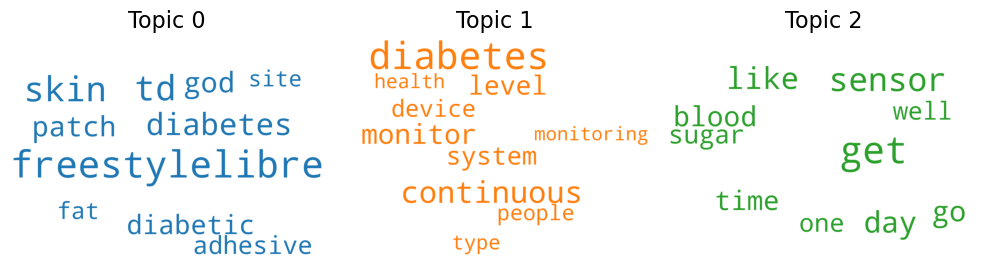

In [118]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

In [119]:
free_praise = free_praises.loc[free_praises['vader_prediction'] == 'Positive', 'text_lower']

In [120]:
free_praise

7        currently impatiently wait tell canada get early currently happy hear fairly accurate ive past i...
18       month fight insurance pharmacy move really excite cant wait get rid scan seeing reading watch re...
23       hey man welcome club nobody want join highly highly recommend every newly dxd read think like pa...
36                         wife put mine back shoulder blade never really catch also cant scratch sleep like
37                                                                                          day sensor thing
                                                        ...                                                 
37811    happy birthday sister turn year today good sister love much thank god bless diabetic diabetes fr...
37814    like lot go proactive alert become rather important get knee deep closedloop system go omnipod w...
37824    dclynick freestylelibre glad well type diabetes keep whatever drs say bad story one best friend ...
37830    type manag

Some praises about Freestyle Libre include:

1. **"absolutely love the Freestyle Libre"**: I absolutely love the Freestyle Libre! It has helped me gain a better understanding of my blood sugar levels, allowing me to make more informed decisions about my health.

2. **"game-changer for me"**: - The Freestyle Libre has been a game-changer for me. The convenience and accuracy of the device have made my diabetes management so much easier and less stressful.

3. **"cannot recommend this product enough"**: - I cannot recommend this product enough! It has truly transformed the way I manage my diabetes and given me a sense of control over my health.

4. **"has made my life so much easier"**: - The Freestyle Libre has made my life so much easier. With the ability to scan my sensor and receive real-time glucose readings, I feel much more in control of my diabetes management.

5. **"has allowed me to better manage my diabetes"**: - This device has been a lifesaver for me. The convenience and accuracy of the Freestyle Libre have made managing my diabetes much less stressful and time-consuming.

6. **"improvement in my blood sugar control"**: - Since I started using the Freestyle Libre, I have seen a significant improvement in my blood sugar control. I no longer have to guess about how certain foods or activities will affect my levels.

7. **"accurate and reliable"**: - I've found the Freestyle Libre to be highly accurate and reliable. It gives me peace of mind knowing that I can trust the readings I'm getting.

## Complaints of Freestyle Libre

In [121]:
free_comp = freestylelibre_data.loc[freestylelibre_data['vader_prediction'] == 'Negative']

In [122]:
# Code taken from: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# Join the different processed titles together.
long_string = ','.join(list(free_comp['text_lower'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()
warnings.simplefilter('ignore')

In [123]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
sen = free_comp['text_lower']
data_words = list(sent_to_words(sen))

In [124]:
print(data_words[:1][0][:30])

['ive', 'try', 'get', 'without', 'doctor', 'prescription', 'expensive', 'hell', 'someone', 'reddit', 'tell', 'people', 'get', 'counter', 'cheap', 'europe', 'get', 'year', 'ago', 'prescribe', 'physician', 'however', 'give', 'monitor', 'sensor', 'applicator', 'didnt', 'even', 'know', 'fl']


In [125]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


In [126]:
# Code taken from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"blood" + 0.036*"sugar" + 0.022*"diabetic" + 0.018*"level" + '
  '0.017*"test" + 0.015*"insulin" + 0.012*"range" + 0.011*"diabetes" + '
  '0.011*"eat" + 0.010*"high"'),
 (1,
  '0.043*"one" + 0.023*"insurance" + 0.020*"switch" + 0.016*"alarm" + '
  '0.014*"pay" + 0.013*"feel" + 0.013*"chance" + 0.013*"cover" + 0.012*"keep" '
  '+ 0.012*"unfortunately"'),
 (2,
  '0.028*"sensor" + 0.026*"get" + 0.025*"day" + 0.018*"time" + 0.017*"ive" + '
  '0.014*"low" + 0.014*"like" + 0.013*"dont" + 0.013*"try" + 0.012*"year"'),
 (3,
  '0.023*"work" + 0.021*"app" + 0.020*"really" + 0.018*"sensor" + 0.018*"go" + '
  '0.017*"device" + 0.017*"would" + 0.016*"could" + 0.016*"month" + '
  '0.014*"thing"')]


In [127]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [128]:
# Visualizing the data
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.321836 -0.036206       1        1  44.222796
3     -0.065705  0.270006       2        1  22.693791
1     -0.124215 -0.188120       3        1  17.286767
0     -0.131916 -0.045680       4        1  15.796646, topic_info=               Term        Freq       Total Category  logprob  loglift
66            blood  397.000000  397.000000  Default  30.0000  30.0000
158             one  399.000000  399.000000  Default  29.0000  29.0000
95            sugar  303.000000  303.000000  Default  28.0000  28.0000
71              day  585.000000  585.000000  Default  27.0000  27.0000
249            work  282.000000  282.000000  Default  26.0000  26.0000
2               app  259.000000  259.000000  Default  25.0000  25.0000
378       insurance  211.000000  211.000000  Default  24.0000  24.0000
52           really  247.000000  247.000000  Default  23.0000  23.0000
25           sensor  877.000000  877.000000  Default  22.0000  22.0000
98             time  437.000000  437.000000  Default  21.0000  21.0000
779        diabetic  187.000000  187.000000  Default  20.0000  20.0000
213          switch  184.000000  184.000000  Default  19.0000  19.0000
16              ive  397.000000  397.000000  Default  18.0000  18.0000
235          device  209.000000  209.000000  Default  17.0000  17.0000
61            would  208.000000  208.000000  Default  16.0000  16.0000
37            could  197.000000  197.000000  Default  15.0000  15.0000
41               go  285.000000  285.000000  Default  14.0000  14.0000
225           level  149.000000  149.000000  Default  13.0000  13.0000
181            test  147.000000  147.000000  Default  12.0000  12.0000
479            like  331.000000  331.000000  Default  11.0000  11.0000
204           alarm  149.000000  149.000000  Default  10.0000  10.0000
556           phone  171.000000  171.000000  Default   9.0000   9.0000
47            month  212.000000  212.000000  Default   8.0000   8.0000
78          insulin  177.000000  177.000000  Default   7.0000   7.0000
28              try  302.000000  302.000000  Default   6.0000   6.0000
382             pay  134.000000  134.000000  Default   5.0000   5.0000
30             year  296.000000  296.000000  Default   4.0000   4.0000
39           finger  154.000000  154.000000  Default   3.0000   3.0000
182           thing  195.000000  195.000000  Default   2.0000   2.0000
244             say  149.000000  149.000000  Default   1.0000   1.0000
71              day  584.860939  585.559567   Topic1  -3.7041   0.8147
98             time  437.060194  437.754380   Topic1  -3.9954   0.8143
16              ive  397.117313  397.809230   Topic1  -4.0912   0.8142
479            like  330.792441  331.494977   Topic1  -4.2739   0.8138
28              try  301.645146  302.340196   Topic1  -4.3662   0.8136
30             year  295.534642  296.231351   Topic1  -4.3866   0.8136
64             also  223.948352  224.644172   Topic1  -4.6640   0.8128
80             last  227.273511  227.981237   Topic1  -4.6493   0.8128
644            read  198.037158  198.743618   Topic1  -4.7870   0.8124
352           start  190.837291  191.535925   Topic1  -4.8240   0.8123
73            first  189.770492  190.476853   Topic1  -4.8296   0.8122
568         reading  183.616730  184.303455   Topic1  -4.8626   0.8122
9              even  195.039718  195.770282   Topic1  -4.8022   0.8122
88             much  180.816144  181.505774   Topic1  -4.8779   0.8121
623      experience  176.281904  177.005254   Topic1  -4.9033   0.8118
432            pump  167.489858  168.178137   Topic1  -4.9545   0.8118
13             give  172.589329  173.304854   Topic1  -4.9245   0.8118
594          though  183.060214  183.837221   Topic1  -4.8656   0.8117
79            issue  155.518815  156.217910   Topic1  -5.0287   0.8114
763            fail  164.820127  165.580084   Topic1  -4.9706   0.8113
18          

##### Finding dominant topic

In [129]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.6800   
1            1             3.0              0.5064   
2            2             2.0              0.8683   
3            3             0.0              0.5687   
4            4             2.0              0.4920   
5            5             1.0              0.9463   
6            6             3.0              0.8113   
7            7             0.0              0.4419   
8            8             3.0              0.8703   
9            9             3.0              0.7943   

                                                                       Keywords  \
0                       sensor, get, day, time, ive, low, like, dont, try, year   
1             work, app, really, sensor, go, device, would, could, month, thing   
2                       sensor, get, day, time, ive, low, like, dont, try, year   
3      blood, sugar, diabetic, level, test, insulin, range, diabetes, eat, high   
4                       sensor, get, day, time, ive, low, like, dont, try, year   
5  one, insurance, switch, alarm, pay, feel, chance, cover, keep, unfortunately   
6             work, app, really, sensor, go, device, would, could, month, thing   
7      blood, sugar, diabetic, level, test, insulin, range, diabetes, eat, high   
8             work, app, really, sensor, go, device, would, could, month, thing   
9             work, app, really, sensor, go, device, would, could, month, thing   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4  This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My d...  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8  It depends on what insurance I have at that time. Last year we had United healthcare and I had t...  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [130]:
df_dominant_topic['Text'].isna().value_counts()

False    36511
True        55
Name: Text, dtype: int64

In [131]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9051   
1        1.0              0.9463   
2        2.0              0.9411   
3        3.0              0.8828   

                                                                       Keywords  \
0      blood, sugar, diabetic, level, test, insulin, range, diabetes, eat, high   
1  one, insurance, switch, alarm, pay, feel, chance, cover, keep, unfortunately   
2                       sensor, get, day, time, ive, low, like, dont, try, year   
3             work, app, really, sensor, go, device, would, could, month, thing   

                                                                                   Representative Text  
0  It would take me up to 2 hours to stick myself with the finger pricker and insulin pen. Obviousl...  
1  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
2  This is interesting to hear. The Freestyle Libre 2 is what I have. It’s my first CGM, but after ...  
3                                          Are you able to get a Dexcom? I find that those help a lot.

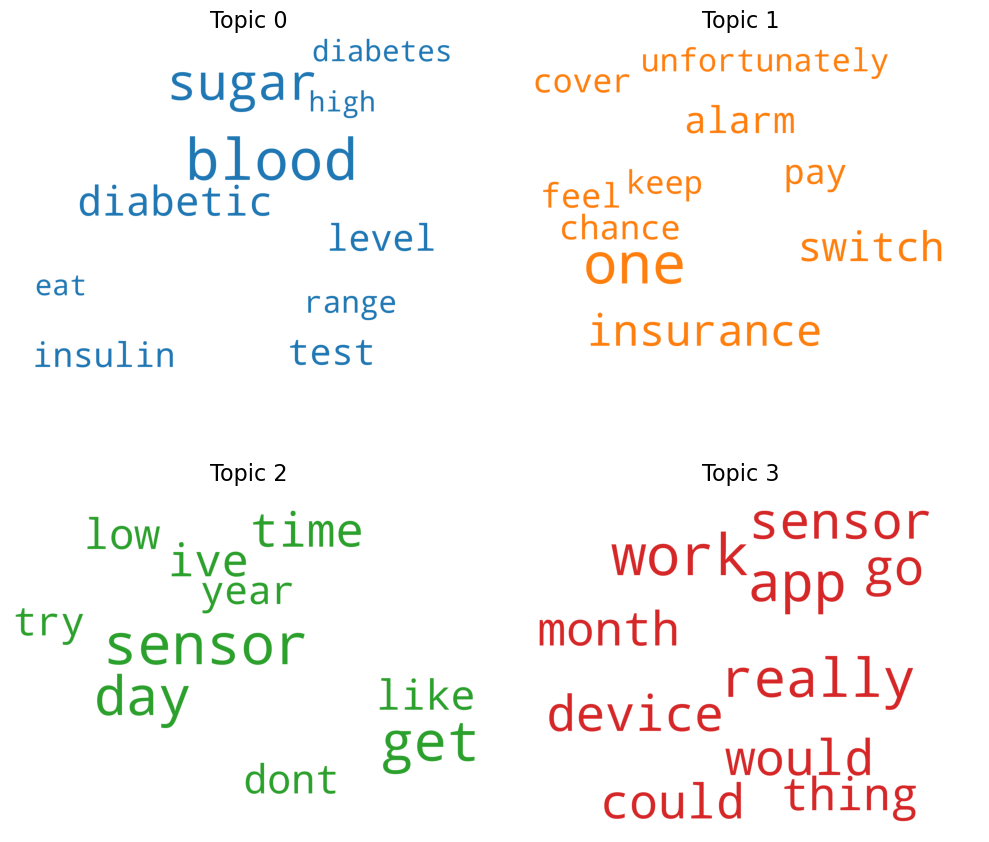

In [132]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

In [133]:
freestylelibre_complaints = free_comp.loc[free_comp['vader_prediction'] == 'Negative', 'text_lower']
print(freestylelibre_complaints.head)

<bound method NDFrame.head of 10       ive try get without doctor prescription expensive hell someone reddit tell people get counter ch...
31       adhd really worried sensor would constant physical annoyance give go however find theyre pretty ...
69       last couple year love found accurate first day sensor tend little less accurate time issue sleep...
74       amaze everybody get diagnosis glucometer check blood moment ac test reflect month average normal...
95                                            turn completely curious come canada big failure hat urgent low
                                                        ...                                                 
37761                                             well unfortunately isnt available shit country egypt stuck
37768    hello buy continuous monitor experiment discover time felt like shit actually experience hypogly...
37798    enough mentally adjust calibrate finger stick first day end occasionally issue sensor wan

Some complaints about Freestyle Libre include:

1. **"the sensor stopped working after only 2 days"**: The sensor is supposed to last for two weeks, but it keeps falling off after just a few days.

2. **"I have had inaccurate readings"**: The freestyle reader often gives inaccurate readings, which is causing me to make incorrect treatment decisions.

3. **"I have had to replace the sensor multiple times"**: I've had several sensors fail within a few days of starting them, which is a waste of money.

4. **"it is too expensive for what it is"**: The cost of the sensors is so high that it's difficult to afford them on a regular basis given that they keep failing.

5. **"The sensor is sometimes painful to insert and leaves a mark on my skin."**: I dread inserting the Freestyle Libre sensor because it's so painful. Sometimes it feels like I'm being stabbed with a needle. And even after the sensor is removed, I'm left with a dark mark on my skin for days.

## Features of Freestyle Libre

In [134]:
# Create word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def createWordCloud(text):
    wordcloud = WordCloud(collocations = False, background_color = 'white', width=1200, height=600).generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")    
    plt.show()

In [135]:
def get_noun_phrases(text):
    blob = TextBlob(text)
    noun_phrases = blob.noun_phrases
    return noun_phrases


freestylelibre_data['noun_phrases'] = freestylelibre_data['text_lower'].apply(get_noun_phrases)
freestylelibre_data

Post ID  \
7       BRDRDT2-t1_imrqfpz   
10      BRDRDT2-t1_imrg3eh   
18       BRDRDT2-t3_x3k69s   
23      BRDRDT2-t1_imspl4k   
31      BRDRDT2-t1_imsv1ll   
...                    ...   
37814   BRDRDT2-t1_imnrrk0   
37824  1565388543370870784   
37830   BRDRDT2-t1_imnpck0   
37835   BRDRDT2-t1_imoqcl4   
37841   BRDRDT2-t1_imod0qi   

                                                                                           Sound Bite Text  \
7      Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...   
10     I've tried to get it without a doctor's prescription. It's expensive as Hell. Someone on Reddit ...   
18     after months of fighting insurance and pharmacy. I can move from Libre 2 to Dexcom G6! i’m reall...   
23     Hey man - welcome to the club nobody wants to join. I highly highly recommend every newly dx’d T...   
31     I have ADHD and I was really worried the sensors would be a constant physical annoyance. I gave ...   
...                                                                                                    ...   
37814  I liked Libre a lot when I had it, but went to Dexcom for the proactive alerts that have become ...   
37824  @dclynick66 @FreeStyleLibre I’m glad you are doing well on type 1 diabetes Keep doing whatever t...   
37830  I am a type1 and to manage my glucose levels I have been using the Freestyle Libre sensor with B...   
37835  I just got switched to a Libre as well and it’s very inconsistent compared to the Dexcom I used ...   
37841  I just spoke with a rep from Abbott. The rep told me they do not yet have any plans to update to...   

                                                                                                     Title  \
7                                                                                                  Libre 3   
10     need help with a prediabetes diet. So a family member has been diagnosed with it, he cant have a...   
18                                                                                 Finally going to Dexcom   
23                                                                                 Newley diagnosed Type 1   
31                                                                     Sensor Questions/Looking for advice   
...                                                                                                    ...   
37814                                                                                              Libre 3   
37824                                                                                                  NaN   
37830                                                                     Any type1 diabetics in this sub?   
37835                                                                                Inconsistent readings   
37841                                                                             Apple IOS 16 public beta   

      Source Type             Post Type Is Paid Media Type  \
7          Forums  Replies and Comments      No   No Media   
10         Forums  Replies and Comments      No   No Media   
18         Forums              Original      No   No Media   
23         Forums  Replies and Comments      No   No Media   
31         Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37814      Forums  Replies and Comments      No   No Media   
37824     Twitter  Replies and Comments      No   No Media   
37830      Forums  Replies and Comments      No   No Media   
37835      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   

                                                                                                       URL  \
7                                  https://www.reddit.com/r/Type1Diabetes/comments/x37wug/libre_3/imrqfpz/   
10     https://www.reddit.com/r/prediabetes/comment

In [136]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
sen = freestylelibre_data['noun_phrases']
data_words = list(sent_to_words(sen))

In [137]:
print(data_words[:1][0][:30])

['accurate', 'ive', 'past', 'issue', 'dexcoms', 'lol', 'gon', 'na', 'awesome', 'location', 'body']


In [138]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [139]:
# Code taken from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"sensor" + 0.023*"work" + 0.020*"day" + 0.019*"dont" + 0.018*"good" + '
  '0.018*"year" + 0.017*"need" + 0.017*"pump" + 0.016*"insurance" + '
  '0.015*"phone"'),
 (1,
  '0.023*"company" + 0.021*"medical" + 0.017*"free" + 0.015*"program" + '
  '0.012*"issue" + 0.012*"talk" + 0.012*"part" + 0.011*"care" + 0.010*"skin" + '
  '0.010*"small"'),
 (2,
  '0.033*"blood" + 0.029*"diabetes" + 0.026*"sugar" + 0.025*"monitor" + '
  '0.023*"level" + 0.017*"ive" + 0.015*"app" + 0.015*"diabetic" + '
  '0.015*"continuous" + 0.014*"type"'),
 (3,
  '0.031*"doctor" + 0.016*"patient" + 0.015*"big" + 0.015*"freestylelibre" + '
  '0.015*"problem" + 0.014*"show" + 0.012*"td" + 0.011*"endo" + 0.011*"post" + '
  '0.009*"couple"')]


In [140]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [141]:
# phrases (nouns) filtered for expectation
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.176344 -0.286897       1        1  40.863396
0     -0.236004  0.248036       2        1  35.952338
1      0.203746  0.033280       3        1  12.301121
3      0.208602  0.005580       4        1  10.883146, topic_info=                Term         Freq        Total Category  logprob  loglift
26            sensor  2573.000000  2573.000000  Default  30.0000  30.0000
196            blood  1990.000000  1990.000000  Default  29.0000  29.0000
223         diabetes  1725.000000  1725.000000  Default  28.0000  28.0000
214            sugar  1572.000000  1572.000000  Default  27.0000  27.0000
21           monitor  1512.000000  1512.000000  Default  26.0000  26.0000
409            level  1366.000000  1366.000000  Default  25.0000  25.0000
85              work  1191.000000  1191.000000  Default  24.0000  24.0000
16            doctor   489.000000   489.000000  Default  23.0000  23.0000
141             dont   999.000000   999.000000  Default  22.0000  22.0000
149             good   969.000000   969.000000  Default  21.0000  21.0000
187             year   964.000000   964.000000  Default  20.0000  20.0000
170             pump   875.000000   875.000000  Default  19.0000  19.0000
6                ive   996.000000   996.000000  Default  18.0000  18.0000
314          company   415.000000   415.000000  Default  17.0000  17.0000
30         insurance   830.000000   830.000000  Default  16.0000  16.0000
1033           phone   811.000000   811.000000  Default  15.0000  15.0000
12               app   912.000000   912.000000  Default  14.0000  14.0000
320       continuous   902.000000   902.000000  Default  13.0000  13.0000
50          diabetic   902.000000   902.000000  Default  12.0000  12.0000
427          medical   376.000000   376.000000  Default  11.0000  11.0000
161             need   905.000000   905.000000  Default  10.0000  10.0000
127             type   868.000000   868.000000  Default   9.0000   9.0000
66               low   810.000000   810.000000  Default   8.0000   8.0000
336           device   788.000000   788.000000  Default   7.0000   7.0000
57              free   312.000000   312.000000  Default   6.0000   6.0000
91            finger   718.000000   718.000000  Default   5.0000   5.0000
32             month   587.000000   587.000000  Default   4.0000   4.0000
5              issue   473.000000   473.000000  Default   3.0000   3.0000
810          patient   260.000000   260.000000  Default   2.0000   2.0000
813          program   268.000000   268.000000  Default   1.0000   1.0000
196            blood  1990.066042  1990.787686   Topic1  -3.4048   0.8946
223         diabetes  1724.906537  1725.692060   Topic1  -3.5478   0.8945
214            sugar  1571.872034  1572.593181   Topic1  -3.6407   0.8945
21           monitor  1511.686475  1512.417064   Topic1  -3.6797   0.8945
409            level  1366.113743  1366.848002   Topic1  -3.7810   0.8944
6                ive   996.138225   996.892339   Topic1  -4.0968   0.8942
320       continuous   901.662947   902.405351   Topic1  -4.1965   0.8941
12               app   911.486738   912.246961   Topic1  -4.1856   0.8941
127             type   867.974433   868.718388   Topic1  -4.2345   0.8941
50          diabetic   902.126601   902.933749   Topic1  -4.1960   0.8940
66               low   810.007205   810.735785   Topic1  -4.3037   0.8940
336           device   787.590586   788.352174   Topic1  -4.3317   0.8940
91            finger   717.580399   718.311220   Topic1  -4.4248   0.8939
211             high   581.229472   581.963185   Topic1  -4.6356   0.8937
578            alarm   535.976552   536.718893   Topic1  -4.7166   0.8936
328             data   513.841451   514.597908   Topic1  -4.7588   0.8935
52            doesnt   492.434002   493.212542   Topic1  -4.8013   0.8934
234             hour   458.794760   459.535295   Topic1  -4.8721   0.8933
65     

In [142]:
# Finding Dominant Topic
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Sound Bite Text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.5756   
1            1             0.0              0.4924   
2            2             0.0              0.6972   
3            3             2.0              0.4894   
4            4             2.0              0.4879   
5            5             2.0              0.5784   
6            6             0.0              0.8115   
7            7             0.0              0.5460   
8            8             2.0              0.5109   
9            9             0.0              0.6750   

                                                                       Keywords  \
0  blood, diabetes, sugar, monitor, level, ive, app, diabetic, continuous, type   
1             sensor, work, day, dont, good, year, need, pump, insurance, phone   
2             sensor, work, day, dont, good, year, need, pump, insurance, phone   
3  blood, diabetes, sugar, monitor, level, ive, app, diabetic, continuous, type   
4  blood, diabetes, sugar, monitor, level, ive, app, diabetic, continuous, type   
5  blood, diabetes, sugar, monitor, level, ive, app, diabetic, continuous, type   
6             sensor, work, day, dont, good, year, need, pump, insurance, phone   
7             sensor, work, day, dont, good, year, need, pump, insurance, phone   
8  blood, diabetes, sugar, monitor, level, ive, app, diabetic, continuous, type   
9             sensor, work, day, dont, good, year, need, pump, insurance, phone   

                                                                                                  Text  
0  My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actua...  
1  I tried it for a little while. No side effects and it did help with insulin resistance in the AM...  
2  i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have ...  
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carro...  
4  This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My d...  
5  I’d like a new pancreas please ✌?? \n\n#type1diabetes #dexcomg6 #dexcomwarrior #t1strong #type1w...  
6  I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, n...  
7  Currently impatiently waiting! I was told we (Canada) should get it early 2023. Currently in the...  
8  It depends on what insurance I have at that time. Last year we had United healthcare and I had t...  
9  I’m on the t-slim pump and Dexcom. Usually my numbers are between 80-150, but today they’ve been...

In [143]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9683   
1        1.0              0.8434   
2        2.0              0.9622   
3        3.0              0.9393   

                                                                       Keywords  \
0             sensor, work, day, dont, good, year, need, pump, insurance, phone   
1         company, medical, free, program, issue, talk, part, care, skin, small   
2  blood, diabetes, sugar, monitor, level, ive, app, diabetic, continuous, type   
3   doctor, patient, big, freestylelibre, problem, show, td, endo, post, couple   

                                                                                   Representative Text  
0  Anytime my son starts to go high the pump automatically fixes it 90% of the time. It also helps ...  
1         Parquet courts!! I have that cd in my car. Also Dexcom is the way to go, life changer for me  
2  So I pricked before getting a Dexcom for like 12 years and my fingers were looking even worse An...  
3  I may have had it for a while because it’s too far advanced to address with diet alone. So I’m t...

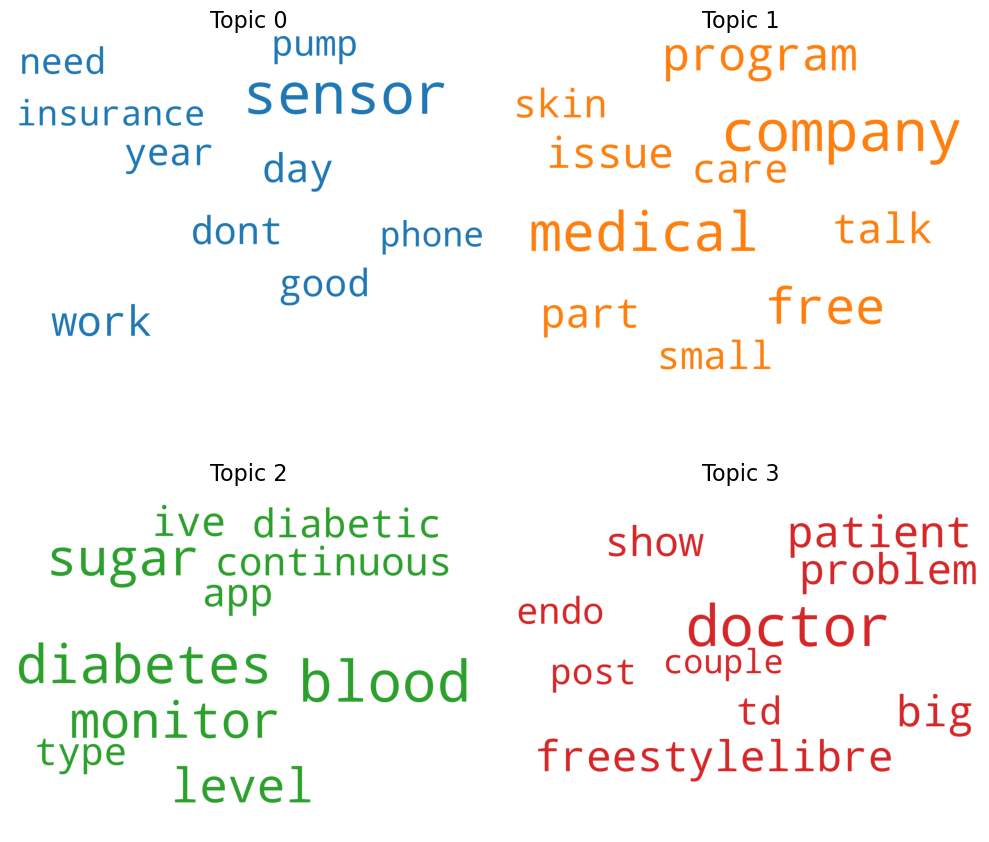

In [144]:
# Wordcloud of Top N words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
warnings.simplefilter('ignore')

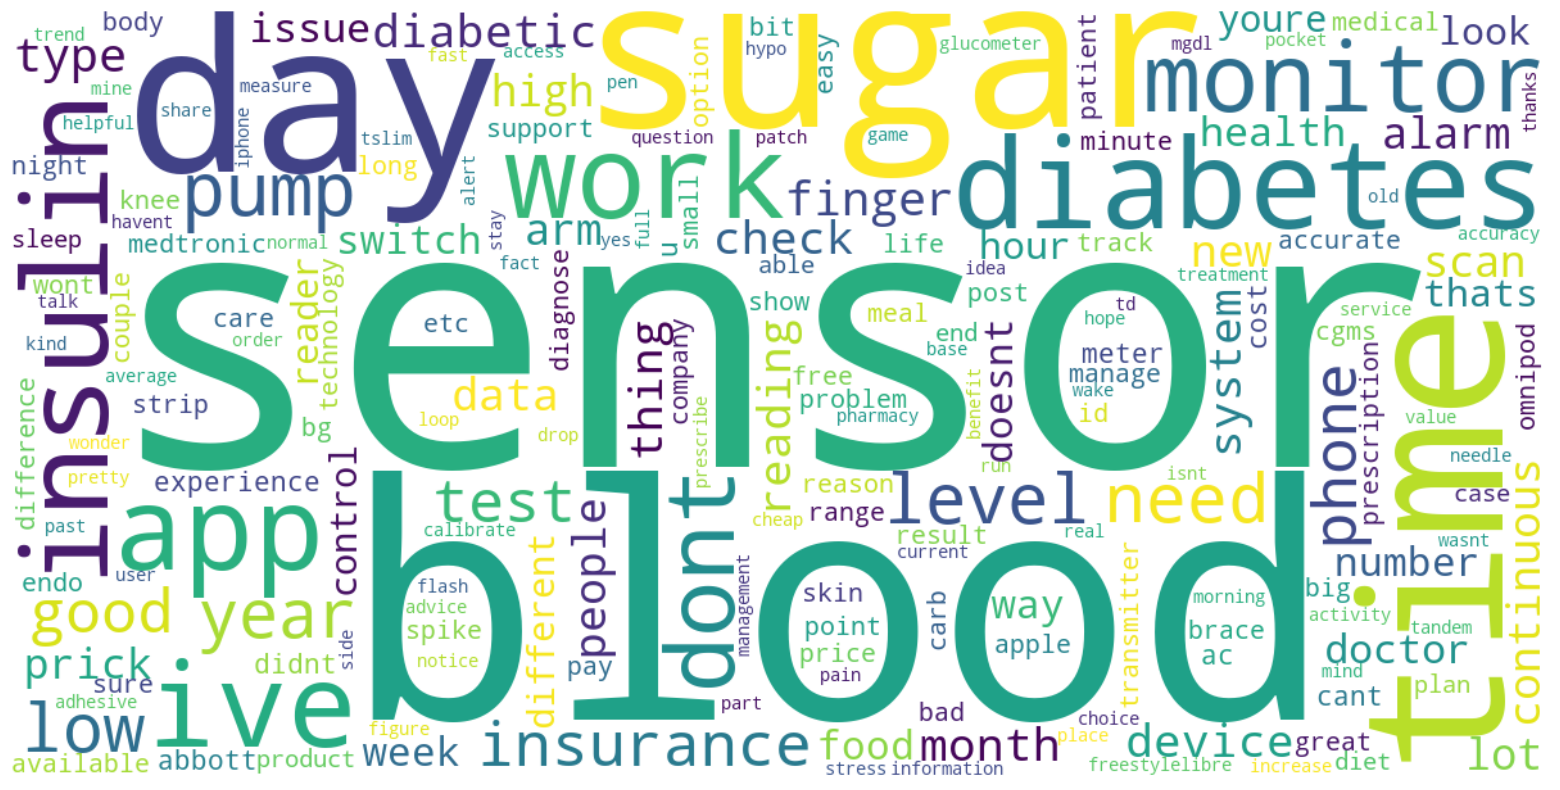

In [145]:
wordlist = []
for x in freestylelibre_data['noun_phrases']:
    wordlist = x + wordlist

createWordCloud(', '.join(wordlist))

**1. No fingersticks**:
"FreeStyle Libre sensor is designed to be worn for up to 14 days and does not require any fingersticks. Instead, I can simply scan the sensor with a handheld reader or a smartphone app to get their glucose readings!"

**2. Trend arrows**:
"Freestyle Libre also provides trend arrows that show users whether their glucose levels are going up, down, or staying stable."

**3. Water-resistant**:
"libre sensor is water-resistant, which means that users can wear it while swimming or showering."

**4. Data storage**:
"freestyle stores up to 90 days of glucose data, allowing users to track their glucose levels over time."

**5. App compatibility**:
"The Libre sensor can be used with a smartphone app that allows users to see their glucose data on their phone and share it with others."

## b. What product features are being talked about?

In [146]:
# Define a preprocessor function for tokenizing and filtering documents.
def preprocess_doc(doc):
    tokenizer = RegexpTokenizer(r"[\w']+")
    tokens = tokenizer.tokenize(doc)
    tokens = [token for token in tokens if not token.isdigit() and len(token) > 3]
    return tokens

# Tokenize and preprocess the documents.
docs = data['text_lower'].apply(preprocess_doc).tolist()

# Create bigram and trigram models.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

# Apply the bigram and trigram models to the documents.
docs = [trigram[bigram[doc]] for doc in docs]

In [147]:
# Remove rare and common tokens

# Create a dictionary and remove rare and common tokens
dictionary = corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

# Create the corpus
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Print some stats
print(f"Number of unique tokens: {len(dictionary)}")
print(f"Number of documents: {len(corpus)}")

Number of unique tokens: 6567
Number of documents: 36511


In [148]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    models = []
    for num_topics in range(start, limit+1, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        models.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return models, coherence_values

# Compute Coherence Score using c_v for a specific LDA model
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=6, step=1)

for num_topics, coherence_score in zip(range(2, 6), coherence_values):
    print(f"\nNum Topics = {num_topics} has Coherence Score of {round(coherence_score, 4)}")

# Find the index of the model with the highest coherence score
max_index = coherence_values.index(max(coherence_values))

# Select the model with the highest coherence score
best_lda_model = model_list[max_index]

# Compute Coherence Score using c_v for the best LDA model
coherence_model_lda = CoherenceModel(model=best_lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nBest Model: Num Topics = {}, Coherence Score: {}'.format(best_lda_model.num_topics, coherence_lda))


Num Topics = 2 has Coherence Score of 0.4458

Num Topics = 3 has Coherence Score of 0.4741

Num Topics = 4 has Coherence Score of 0.4972

Num Topics = 5 has Coherence Score of 0.4993

Best Model: Num Topics = 6, Coherence Score: 0.5222814498811562


In [149]:
# Set parameters
num_topics = best_lda_model.num_topics
chunksize = 1000 
passes = 20 
iterations = 500
eval_every = 1  

# Train LDA model
lda_model = LdaModel(
    corpus=corpus, 
    id2word=dictionary.id2token, 
    chunksize=chunksize,
    alpha='auto', 
    eta='auto', 
    iterations=iterations,
    num_topics=num_topics, 
    passes=passes, 
    eval_every=eval_every
)

# Print the top keywords for each topic
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.025*"time" + 0.018*"insulin" + 0.018*"year" + 0.014*"know" + 0.013*"take" + 0.013*"good" + 0.013*"really" + 0.013*"thing" + 0.012*"start" + 0.012*"make"
Topic 1: 0.031*"sensor" + 0.028*"work" + 0.022*"like" + 0.022*"would" + 0.020*"freestyle_libre" + 0.017*"libre" + 0.016*"think" + 0.014*"look" + 0.013*"want" + 0.013*"phone"
Topic 2: 0.025*"cheap" + 0.021*"price" + 0.018*"brand" + 0.016*"strip" + 0.010*"freestylelibre" + 0.009*"warm" + 0.009*"month_supply" + 0.008*"email" + 0.008*"bread" + 0.007*"government"
Topic 3: 0.030*"medtronic" + 0.028*"wear" + 0.027*"omnipod" + 0.022*"tandem" + 0.020*"tslim" + 0.013*"place" + 0.012*"site" + 0.011*"back" + 0.010*"small" + 0.009*"skin"
Topic 4: 0.031*"diabetes" + 0.020*"continuous_glucose_monitor" + 0.019*"people" + 0.014*"glucose" + 0.013*"data" + 0.012*"level" + 0.010*"device" + 0.009*"diabetic" + 0.009*"monitor" + 0.008*"blood_sugar"
Topic 5: 0.045*"month" + 0.036*"insurance" + 0.030*"supply" + 0.023*"cover" + 0.022*"insulin" + 0.01

In [150]:
# Visualize the topics
pyLDAvis.enable_notebook()

# Set the file path for the prepared LDA visualization data
LDAvis_data_filepath = os.path.join('ldavis_prepared_' + str(best_lda_model.num_topics))

# If the prepared LDA visualization data does not exist, create it
if not os.path.isfile(LDAvis_data_filepath):
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Otherwise, load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Save the prepared LDA visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_' + str(best_lda_model.num_topics) + '.html')

# Display the prepared LDA visualization
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.219225  0.026901       1        1  49.539955
0     -0.186339  0.055461       2        1  19.078096
2     -0.146133 -0.138661       3        1  13.880559
1      0.298666  0.213343       4        1   8.693497
4      0.035835  0.185487       5        1   6.005645
5      0.217196 -0.342531       6        1   2.802248, topic_info=                                 Term         Freq        Total Category  \
61                        blood_sugar  4964.000000  4964.000000  Default   
159                              high  4217.000000  4217.000000  Default   
295                             phone  2845.000000  2845.000000  Default   
190                            sensor  6869.000000  6869.000000  Default   
283        continuous_glucose_monitor  2856.000000  2856.000000  Default   
180                   freestyle_libre  4413.000000  4413.000000  Default   
432                          diabetes  4531.000000  4531.000000  Default   
127                             libre  3875.000000  3875.000000  Default   
149                              time  8913.000000  8913.000000  Default   
147                             month  3039.000000  3039.000000  Default   
635                           glucose  1997.000000  1997.000000  Default   
406                             sugar  2214.000000  2214.000000  Default   
46                            insulin  8175.000000  8175.000000  Default   
45                               hour  2118.000000  2118.000000  Default   
52                             people  3067.000000  3067.000000  Default   
69                               like  7496.000000  7496.000000  Default   
68                              level  1730.000000  1730.000000  Default   
126                             issue  2464.000000  2464.000000  Default   
144                         insurance  2461.000000  2461.000000  Default   
273                             watch  1250.000000  1250.000000  Default   
192                              year  6322.000000  6322.000000  Default   
140                              dont  6351.000000  6351.000000  Default   
556                              test  2695.000000  2695.000000  Default   
148                            supply  2022.000000  2022.000000  Default   
26                            omnipod  1988.000000  1988.000000  Default   
115                             would  6529.000000  6529.000000  Default   
427                             alarm  1556.000000  1556.000000  Default   
394                              call  1903.000000  1903.000000  Default   
917                         medtronic  2231.000000  2231.000000  Default   
184                              know  5290.000000  5290.000000  Default   
149                              time  8912.200457  8913.031303   Topic1   
184                              know  5289.839294  5290.669939   Topic1   
224                             think  5102.976258  5103.806457   Topic1   
8                                take  4685.429598  4686.260109   Topic1   
255                              good  4619.719107  4620.549979   Topic1   
219                            really  4606.071355  4606.901222   Topic1   
362                             thing  4492.104391  4492.934533   Topic1   
355                             start  4444.477130  4445.307708   Topic1   
12                               help  4274.907851  4275.738506   Topic1   
129                              much  4202.789425  4203.619849   Topic1   
158                              even  3994.895280  3995.726534   Topic1   
181                              give  3771.773623  3772.604364   Topic1   
378                             still  3672.604773  3673.435256   Topic1   
332                             first  3363.193546  3364.024075   Topic1   
107                             since  3169.010971  3169.841476   Topic1   
67                           

### Product Features:

**Topic 1**: Diabetes management

**Topic 2**: Blood sugar monitoring and management

**Topic 3**: Continuous Glucose Monitoring (CGM) and features

**Topic 4**: Product functionality and usability

**Topic 5**: Lifestyle Impact

**Topic 6**: CGM Accessories / Phone 

## c. How do consumer opinions of Dexcom and Freestyle Libre compare?

In [151]:
# Calculate the number of reviews for each sentiment for Dexcom and Freestyle Libre
dexcom_positive_count = len(dexcom_data[dexcom_data['vader_prediction'] == 'Positive'])
dexcom_negative_count = len(dexcom_data[dexcom_data['vader_prediction'] == 'Negative'])
dexcom_neutral_count = len(dexcom_data[dexcom_data['vader_prediction'] == 'Neutral'])

libre_positive_count = len(freestylelibre_data[freestylelibre_data['vader_prediction'] == 'Positive'])
libre_negative_count = len(freestylelibre_data[freestylelibre_data['vader_prediction'] == 'Negative'])
libre_neutral_count = len(freestylelibre_data[freestylelibre_data['vader_prediction'] == 'Neutral'])

# Calculate the total number of reviews for each product
dexcom_review_count = dexcom_positive_count + dexcom_negative_count + dexcom_neutral_count
libre_review_count = libre_positive_count + libre_negative_count + libre_neutral_count

# Compare the number of reviews for each product and print the result
if dexcom_review_count > libre_review_count:
    print('Dexcom is a more popular topic of discussion than Freestyle Libre with {} more mentions in the posts'.format(dexcom_review_count - libre_review_count))
else:
    print('Freestyle Libre is a more popular topic of discussion than Dexcom with {} more mentions in the posts'.format(libre_review_count - dexcom_review_count))

# Create a dataframe to show the breakdown of sentiment for each product
sentiment_breakdown_data = pd.DataFrame({
    'Product': ['Dexcom', 'Dexcom', 'Dexcom', 'Freestyle Libre', 'Freestyle Libre', 'Freestyle Libre'], 
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral'],
    'Count': [dexcom_positive_count, dexcom_negative_count, dexcom_neutral_count, libre_positive_count, libre_negative_count, libre_neutral_count]
})

# Display the sentiment breakdown data
sentiment_breakdown_data

Dexcom is a more popular topic of discussion than Freestyle Libre with 12001 more mentions in the posts


Product Sentiment  Count
0           Dexcom  Positive  11910
1           Dexcom  Negative   5406
2           Dexcom   Neutral   1970
3  Freestyle Libre  Positive   5157
4  Freestyle Libre  Negative   1702
5  Freestyle Libre   Neutral    426

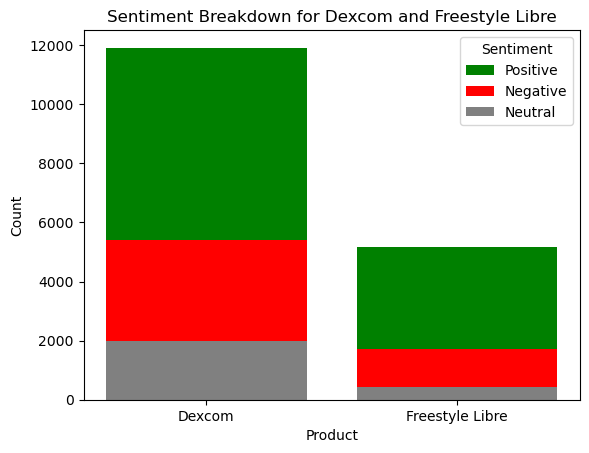

In [152]:
# Plot the sentiment breakdown for Dexcom and Freestyle Libre

fig, ax = plt.subplots()

sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
for i, sentiment in enumerate(sentiment_breakdown_data['Sentiment'].unique()):
    sentiment_data = sentiment_breakdown_data[sentiment_breakdown_data['Sentiment'] == sentiment]
    ax.bar(sentiment_data['Product'], sentiment_data['Count'], color=sentiment_colors[sentiment],
           label=sentiment)

ax.legend(title='Sentiment')
ax.set_xlabel('Product')
ax.set_ylabel('Count')
ax.set_title('Sentiment Breakdown for Dexcom and Freestyle Libre')

plt.show()

**Interpretation**:

From the above plot:
1. Dexcom is clearly being tweeted more than Freestyle Libre. 
2. The percentage of positive tweets are high for Freestyle Libre (approx. 2.1%) than Dexcom (approx. 1.6%).
3. The amount of neutral views about Dexcom is much higher (probably due to more tweets about Dexcom).
4. Both products have high positive sentiments associated with them.

## d. What is the overall sentiment regarding the two products?

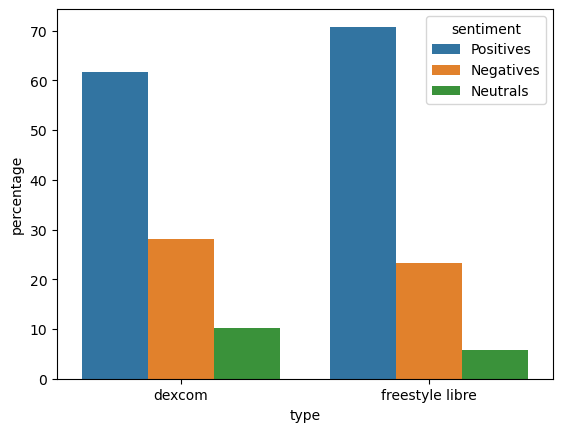

In [153]:
# Calculate the percentage breakdown of reviews by sentiment for each product
dexcom_percentages = [dexcom_positive_count/dexcom_review_count*100, dexcom_negative_count/dexcom_review_count*100, dexcom_neutral_count/dexcom_review_count*100]
libre_percentages = [libre_positive_count/libre_review_count*100, libre_negative_count/libre_review_count*100, libre_neutral_count/libre_review_count*100]

# Create a new DataFrame with the percentage breakdown data
sentimentpercentdata = pd.DataFrame({'type': ['dexcom']*3 + ['freestyle libre']*3,
                                     'sentiment': ['Positives', 'Negatives', 'Neutrals']*2,
                                     'percentage': dexcom_percentages + libre_percentages})

# Create a barplot to visualize the percentage breakdown data
ax = sns.barplot(x='type', y='percentage',
                 hue='sentiment', data=sentimentpercentdata,
                 errwidth=0)


**Interpretation**: The overall sentiment regarding the two products is positive.

## e. Based on your analysis, which one would you recommend?

Based on our analysis, Dexcom is a more popular product than Freestyle Libre as it has a significantly higher count of mentions in the posts. While the relative positive sentiment of Dexcom may be lower than that of Freestyle Libre, the fact that it has a much larger volume of mentions suggests that it has a larger user base and therefore more people are talking about it.

Additionally, the high number of positive mentions for Dexcom indicates that it is well-liked by many users. This could be due to factors such as ease of use, accuracy, or overall customer satisfaction.

Overall, we would recommend Dexcom over Freestyle Libre based on its popularity and positive user sentiment.

## f. What would you tell each of these brands to improve?

Based on the unmet needs and complaints analyzed for Dexcom above, below are our recommendations:

### Dexcom:

**1. Improve Dexcom sensor accuracy and reliability**: While Dexcom's CGM systems have received positive reviews overall, some users have reported issues with inaccurate readings, sensor errors, and device failures. To address these concerns, Dexcom could invest in improving the quality and reliability of its products through rigorous testing, better sensor technology, and enhanced manufacturing processes.

**2. Add snooze button after alarm if blood glucose goes off**: Alarms can be disruptive and alarming, especially if they occur during important meetings, while driving, or while trying to sleep. Allowing users to snooze alarms would enable them to manage their blood glucose levels without causing additional anxiety or disrupting their daily routines. In addition, it will give more control over how users respond to alerts, potentially enhancing their overall experience with the Dexcom system.

**3. Enhance customer support**: Some customers have reported difficulties getting timely and effective support from Dexcom's customer service team. To address these concerns, Dexcom could consider improving its support channels, such as offering more comprehensive online resources, hiring additional support staff, and improving response times.


### Freestyle Libre:

**1. Reduce calibration time**: Frequent calibrations can be inconvenient and time-consuming for users, and can disrupt their daily routines. By reducing the calibration time to be on par with Dexcom, Freestyle Libre could provide a better user experience, making it more attractive to current and potential users. In addition, calibration errors can lead to inaccurate glucose readings, which can cause users to take incorrect actions. By reducing the calibration time, Freestyle Libre could help ensure that users have more accurate and reliable readings, enhancing the overall accuracy of the system.

**2. Enhance Libre sensor durability**: Some users have reported issues with the sensor's adhesive, such as it coming loose or causing skin irritation. Abbott could invest in developing stronger, more durable adhesives that can better withstand wear and tear, as well as reducing the likelihood of skin irritation.

**3. Offer additional sensor options**: Some users have expressed interest in having different sensor sizes or shapes, such as a smaller or more discreet sensor for wearing on the arm or wrist. Abbott could explore developing new sensor options that offer greater flexibility and customization for users.

# 3. (Extra Credit) CGM Consumer related analysis

## a. Can you identify different types (segments) of consumers or create segments?

In [154]:
# Custom search terms for type 1 and type 2 diabetes
type1_diabetes = ['t1d', 'type i', 'type 1', 'type1', 'typei', 'typeone', 'type one', 'juvenile diabetes', 'autoimmune diabetes', 'insulin-dependent diabetes']
type2_diabetes = ['t2d', 'type ii', 'type 2', 'type2', 'typeii', 'type two', 'typetwo', 'adult-onset diabetes', 'insulin-resistant diabetes', 'non-insulin dependent diabetes']

# Excluded words
excluded_words = ['diabetes', 'insulin', 'type', 'glucose', 'diabetic', 'sugar', 'pump', 'blood', 'continuous', 'high', 'low', 'test', 'medication']

# Function to filter posts based on search terms
def filter_posts_segments(x, params):
    for word in params:
        if word in x:
            return True
    return False

# Add columns to the dataframe indicating if the post is about type 1 or type 2 diabetes
data['type_1'] = data['Sound Bite Text'].apply(filter_posts_segments, params=type1_diabetes)
data['type_2'] = data['Sound Bite Text'].apply(filter_posts_segments, params=type2_diabetes)

# Create string of relevant words for type 1 diabetes
type1d_str = ""
for text in data[data['type_1']]['text_lower']:
    for word in text.split(' '):
        if word not in excluded_words:
            type1d_str += (' ' + word)
            
# Create string of relevant words for type 2 diabetes
type2d_str = ""
for text in data[data['type_2']]['text_lower']:
    for word in text.split(' '):
        if word not in excluded_words:
            type2d_str += (' ' + word)

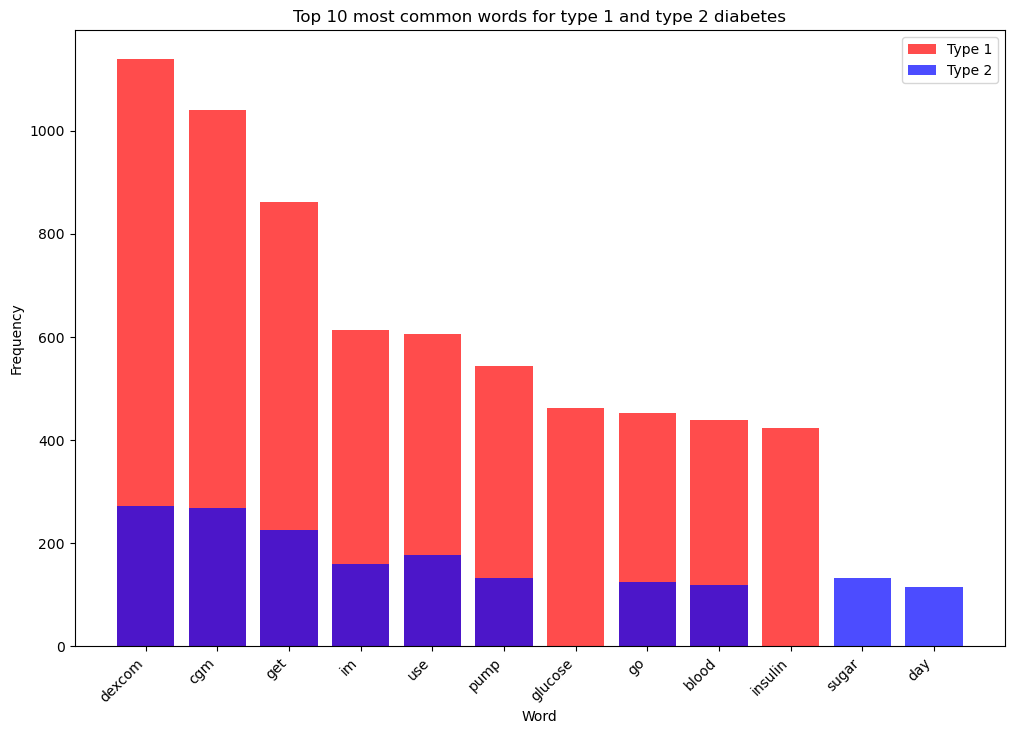

In [155]:
# Create a CountVectorizer object to create the word frequency matrix
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data
word_freq_matrix = vectorizer.fit_transform(data['text_lower'])

# Create a pandas DataFrame from the word frequency matrix
df_word_freq = pd.DataFrame(word_freq_matrix.toarray(), columns=vectorizer.get_feature_names())

# Add columns to the DataFrame indicating if the post is about type 1 or type 2 diabetes
df_word_freq['type_1'] = data['type_1']
df_word_freq['type_2'] = data['type_2']

# Get the total count of each word for type 1 and type 2 diabetes
type1_word_counts = df_word_freq[df_word_freq['type_1'] == True].sum()[:-2]
type2_word_counts = df_word_freq[df_word_freq['type_2'] == True].sum()[:-2]

# Get the top 10 most common words for type 1 and type 2 diabetes
top10_type1 = type1_word_counts.sort_values(ascending=False)[:10]
top10_type2 = type2_word_counts.sort_values(ascending=False)[:10]

# Create a bar chart of the top 10 most common words for type 1 and type 2 diabetes
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(top10_type1.index, top10_type1, color='red', alpha=0.7, label='Type 1')
ax.bar(top10_type2.index, top10_type2, color='blue', alpha=0.7, label='Type 2')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 most common words for type 1 and type 2 diabetes')
plt.legend()
plt.show()

**Interpretation**: Looks like the top 10 most common words are associated more with type 1 diabetes than type 2.

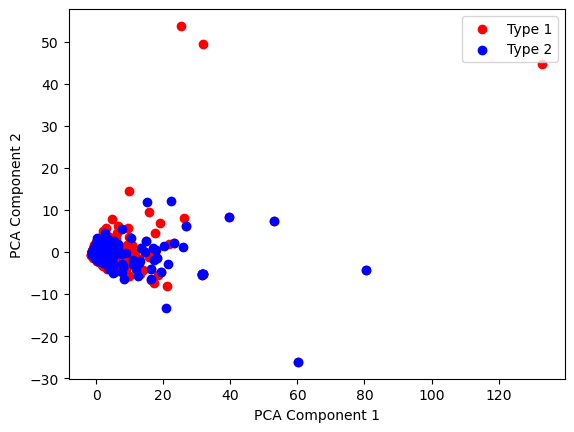

In [156]:
# Create a CountVectorizer object to create the word frequency matrix
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data
word_freq_matrix = vectorizer.fit_transform(data['text_lower'])

# Perform PCA on the word frequency matrix
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(word_freq_matrix.toarray())

# Plot the data points with different colors for type 1 and type 2 diabetes
plt.scatter(X_reduced[data['type_1'], 0], X_reduced[data['type_1'], 1], c='red', label='Type 1')
plt.scatter(X_reduced[data['type_2'], 0], X_reduced[data['type_2'], 1], c='blue', label='Type 2')
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Additionally, on study of our data, there are several segements that can be identified amongst patients which impact their usage of and experince with CGM.

Additional Segments can exist on the basis of following factors:
- Geographical Region
- Age (Kids, adolescents, senior citizens, etc.)
- Health condition (Pregnancy, mental health, etc.)
- Lifestyle (active, sedintary, professional sportpersons, etc.)

## b. Are different benefits more important to different consumer types?

While individual preferences and needs should always be considered, there are some general differences in the benefits that may be more important to type 1 and type 2 diabetes patients.

First, type 1 diabetes is an autoimmune disease that often begins in childhood or adolescence and requires lifelong insulin therapy to manage. Type 2 diabetes, on the other hand, is typically diagnosed in adulthood and may be managed through diet, exercise, and medication. However, some people with type 2 diabetes may also require insulin therapy. As a result, type 1 diabetes patients may emphasize benefits related to insulin therapy, such as access to different types of insulin or insulin delivery methods. In contrast, type 2 diabetes patients may emphasize benefits related to lifestyle management, such as nutrition counseling or access to exercise programs.

Second, for type 1 diabetes patients, the most important benefit is likely to be the ability to regulate blood sugar levels effectively, which is crucial to managing their condition and preventing complications. Other important benefits may include ease of use and portability, as type 1 diabetes patients may need to monitor their blood sugar levels and administer insulin multiple times throughout the day.

On the other hand, for type 2 diabetes patients, the most important benefit may be managing their condition without relying on medications or with minimal medication use. This is because type 2 diabetes is often linked to lifestyle factors such as diet and exercise, and many patients may prefer to manage their condition through lifestyle changes rather than medication. Other important benefits may include ease of use and convenience, as type 2 diabetes patients may need to monitor their blood sugar levels and take medications regularly.

Additionally, generally speaking:

- **For people leading a sedentary lifestyle, the duration of using CGM is not a problem for the benefit of inobtrusion it offers. While, for physically active people, they would prefer a quick finger-prick rather than keeping on a CGM sensor for a longer time.**

    'Dude, that is awesome. I'm really struggling with going on to a CGM. I train 2 - 4 times a day every day, saunas and swims for over an hour a few times a week. Contact sports also about twice a week. I feel that going on a CGM is going to be harder for me than finger pricks. How long does one sensor stay on you with all your activity?'
    
    
- **The metrics provided and additional information through CGM can be more valuable for females beginning menstruation, pregnant women or generally people going through harmonal changes.**

    'Not sure if anyone has said this, but noting her age, I'd strongly consider CGM I'd you can. Periods with Type 1 are confusing and hard! I was diagnosed at age 6 (37 now) and still haven't fully figured it out.'
    
    'Will I need to undergo additional blood work, testing, or scans compared to a pregnant person without diabetes? How can I expect my insulin needs to change? Can I continue wearing my CGM (if applicable) or do I need to be doing more fingerstick monitoring? How to prepare for type 1 diabetes and pregnancy'
    
    
- **Healthcare systems and hence the expenses related to CGM differ by geographical regions. This means that it being affordable matters to certain people more than others.**

    'Someone asked me a question about, "How some pricks use CGM’s to prove points about diets and shit," and he asked if, "Can that leave permanent affects on their body?" I answered the question but it really made me think. Now, I'm so lucky and will be forever grateful to have the amazing healthcare system of the United States healthcare system!!!...'

    'Hi u/iAmMexican11 \- I was about the same age as you when I was diagnosed, after an epic trip to the emergency room and stay in ICU with a blood sugar of 777! If you're techy, I can really recommend the app "rapidcalc" to help with tracking your insulin on board and meal time boluses. I loved it before I got a smart pump/CGM combo. A modern insulin pump that integrates with and adjusts based on continuous glucose monitor is the best therapy available these days. Assuming you are in Mexico, and not knowing how health care works there, I can only speak as a USA citizen. Do not let your PCP (Primary Care Physician) manage your diabetes.'

# References

Vader: https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html

TextBlob: https://textblob.readthedocs.io/en/dev/

CountVectorizer: https://kavita-ganesan.com/how-to-use-countvectorizer/#.Y_xGeezMKhY

Wordcloud: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

LDA Model: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#4.-Build-the-Bigram,-Trigram-Models-and-Lemmatize